---
# Report on NLP With Hotel Review
---

#### Author: Kartik 
#### Contact: kkakar664@gmail.com
#### Date: October 26, 2023

## Table of Contents
---
1. [Introduction](#introduction)
2. [Assumptions & Limitations](#assumptions)
3. [Methods](#methods)
4. [Data Cleaning](#cleaning)
5. [Exploratory Data Analysis](#EDA)
6. [Preprocessing](#preprocessing)
7. [Modelling](#modelling)
> - [Logistic Regression Model](#logistic)
> - [Decision Tree Classifier](#decision)
> - [PCA with a Decision Tree Classifier](#pca)
8. [Best Model Selection](#bestModel)
9. [Confusion Matrix](#confusion)
10. [Conclusion](#conclusion)



## Introduction <a class="anchor" id="introduction"></a>
---

In this report, we undertake a comprehensive analysis to enhance customer satisfaction and hotel ratings for Hotel Management Inc. Our approach begins with Exploratory Data Analysis (EDA) to uncover actionable insights, followed by data preprocessing and modeling. We create logistic regression and PCA-based decision tree models, optimizing and evaluating their performance. Through this analysis, we aim to empower Hotel Management Inc. with data-driven insights to enhance their services, reputation, and customer experiences.

## Assumptions & Limitations <a class="anchor" id="assumptions"></a>
---

#### Assumptions:
We assume that the sentiment expressed in this dataset is a reliable and accurate indicator of customer satisfaction. This is very important because after running our models, we will be making some data-driven recommendations and we need the data is to correct.

#### Limitations:
1. This is a large dataset containing **515,738 rows** and **29 columns**. Scaling will make it a difficult and lengthy process for the computer to run the models.

2. Machine learning models, especially the ones used in this analysis, generally lack the ability to understand the context or sarcasm in language, which could lead to misclassifications. For instance, a review stating "the room was not bad" might be classified as negative due to the presence of the word "bad", even though the overall sentiment is positive.

## Methods <a class="anchor" id="methods"></a>
---

We will be using Python programming language and its libraries such as pandas for data manipulation, matplotlib for data visualization, and sklearn for machine learning and data preprocessing. We will use Jupyter notebook as our Integrated Development Environment (IDE) which allows for interactive programming and visualization. For our modelling, we will create two distinct models for predicting reviewer scores. First, we will fit a **Logistic Regression model** and a **Decision Tree** to analyze train and test accuracy on unscaled data. Then, we will do Scaling using **Standard Scaler** and utilize a **pipeline** that combines **Principal Component Analysis (PCA) with a decision tree classifier**. This model will be optimized through **hyperparameter tuning using cross-validation**. Finally, we will compare the **accuracies** on all the models and build a comfusion matrix and a classification report.

---

First we will load our dataset called 'Hotel_Reviews.csv'

#### Data Loading

In [1]:
# If the libraries are not preinstalled, please uncomment the following and install as needed:
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install nltk
# pip install string
# pip install scikit-learn
# pip install scipy

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import TruncatedSVD
from scipy.stats import randint
from scipy import sparse as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Hotel_Reviews.csv', index_col = 0)

In [3]:
# Set display options to show all columns.
pd.set_option('display.max_columns', None)

In [4]:
# Display the first 5 rows of the dataframe to get an overview of the data
df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [5]:
# Display the last 5 rows of the dataframe to get an overview of the data
df.tail()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
515733,168,8.1,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,704,48.203745,16.335677,30,8,2015,0,0,0,0,0,1,0,0,0,0,0,1,1,5
515734,168,8.1,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,712,48.203745,16.335677,22,8,2015,0,0,0,0,0,1,0,0,0,0,0,1,1,2
515735,168,8.1,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,0,715,48.203745,16.335677,19,8,2015,0,0,0,0,0,1,0,0,0,0,0,1,1,4
515736,168,8.1,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,1,717,48.203745,16.335677,17,8,2015,0,0,0,0,0,1,0,0,0,0,0,1,1,3
515737,168,8.1,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,0,725,48.203745,16.335677,9,8,2015,0,0,0,0,0,1,0,0,0,0,0,1,1,2


In [6]:
# Randomly sample 15 rows from the dataframe
df.sample(15)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
249006,602,8.5,Breakfast arrangement and choice for price po...,14,2494,Bed good quiet,4,9,1,460,51.506935,-0.126012,30,4,2016,0,0,0,1,0,0,0,0,1,0,0,0,1,1
222218,72,9.0,The extra service charges presumed on your fi...,61,290,Almost everything,3,18,1,15,51.501722,-0.184624,19,7,2017,0,0,0,1,0,0,0,0,1,0,0,0,1,1
313377,309,8.1,The hotel was definately not 5 and lacked qua...,10,2270,No Positive,0,1,0,45,52.351145,4.874076,19,6,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,2
400472,393,8.6,Breakfast was poor Need more staff Need to im...,36,3823,Location My room was quite big others were to...,11,6,1,97,41.394678,2.162638,28,4,2017,0,0,1,0,0,0,0,1,0,0,0,0,1,6
22945,70,8.3,The walls are thin and you could hear everything,10,272,Lovely chilled breakfast and will book again ...,39,2,1,472,51.461122,-0.275622,18,4,2016,0,0,0,1,0,0,0,0,1,0,0,0,1,1
52788,687,8.2,For the Room Cost having to pay for Wi Fi whe...,22,2898,No Positive,0,3,0,267,51.515632,-0.175737,9,11,2016,0,0,0,0,1,0,0,0,1,0,0,0,1,6
165173,2288,8.1,No Negative,0,9568,asked for a quiet room and got a silent one w...,38,1,1,422,51.511099,-0.120867,7,6,2016,0,0,0,1,0,0,0,0,1,0,0,0,1,1
165523,2288,8.1,Long line during check in Super slow free int...,82,9568,Great location nice comfortable lobby Strong ...,12,11,0,536,51.511099,-0.120867,14,2,2016,0,0,0,1,0,0,0,0,1,0,0,0,1,1
445022,315,7.8,Toilet shower in room shower tray fills up so...,66,3773,Nothing,2,4,0,103,52.292457,4.944434,22,4,2017,0,0,0,1,0,0,1,0,0,0,0,0,0,3
514249,1172,7.8,Booking com said breakfast was included I Had...,15,5945,Very clean,4,10,0,129,51.499981,-0.192879,27,3,2017,0,0,0,0,0,1,0,0,1,0,0,0,1,3


This quick check shows that the data is loaded properly, so we can perform the basic statistical analysis. 

---

In [7]:
# Get information about the dataframe including column names, data types, and non-null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 10  L

**df.info():** This function offers a concise summary of the dataframe, providing valuable insights from the output.

**Based on the summary:**

**1. Size:** The dataset contains **515,738 rows and 29 columns**. Each row representing a hotel review.\
**2. Data Types:** The data includes columns of various data types, including **integers (int64), floats (float64), and strings (object)**.\
**3. Non-Null Count:** All columns have non-null values for all **515,738 entries**, indicating no missing data.\
**4. Numeric Data:** The majority of columns are numeric, including review scores, counts of negative and positive words, and various hotel and review-related numerical features.\
**5. Categorical Data:** Two columns, ***'Negative_Review'*** and ***'Positive_Review'*** contain text data.\
**6. Memory Usage:** The dataset consumes approximately **118.0+ MB** of memory.

This summary provides an overview of the dataset's structure, data types, and non-null values, setting the stage for further analysis and exploration.

---

## Data Cleaning <a class="anchor" id="cleaning"></a>

Data cleaning is a critical step in the data analysis process, ensuring the dataset's quality and reliability. In this case, we will check for any missing values and duplicated rows. Missing values can lead to inaccurate analyses, while duplicates can distort statistical insights and model performance. By identifying and addressing these issues, we maintain the dataset's integrity, enabling more accurate and meaningful analysis and modeling.

#### Check for Duplicate rows

In [8]:
# Check for duplicate rows
df.duplicated().sum()        

539

`Finding:`
This indicates that there are **539 duplicate rows** in the dataset. 

We will look at the percentage these duplicate rows comprise of and decide if we want to drop them or not.

In [9]:
# Check for duplicate rows and put them in a new variable called 'duplicate_count'
duplicate_count = df.duplicated().sum()

# Calculate the percentage of duplicate rows
total_rows = len(df)
percentage_duplicates = (duplicate_count / total_rows) * 100

percentage_duplicates


In [84]:
# Print out the percentage of duplicates
print(percentage_duplicates)

0.1045104297143123


In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

# Print the answer.
print(f"Dropped {duplicate_count} duplicate rows. Duplicates were removed to ensure data integrity.")

Dropped 539 duplicate rows. Duplicates were removed to ensure data integrity.


`Finding:` There were **539 or 0.1% duplicate rows** in the dataset, because this is such a small number as compared to our dataset **(515,738 rows)**, we can safely drop them without worrying about its affects on our result.

#### Check for Null Values

In [11]:
# Check if there any Null values and count their number in each column
df.isna().sum(axis=0)

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

`Finding:` The output reveals that there are **no missing values (null values)** in any of the columns of the 'Hotel_Reviews' dataset. This data cleanliness is advantageous as it ensures that each attribute has complete information, facilitating reliable and comprehensive analyses without the need for imputation or data filling. This absence of missing data enhances the dataset's suitability for subsequent modeling and insights generation.


Now that we've dropped all the duplicated rows and checked for any missing values, we can move on to some statistical analysis of our dataset, i.e, performing EDA.

---
## Exploratory Data Analysis <a class="anchor" id="EDA"></a>
---

Exploratory Data Analysis (EDA) is crucial as it provides an initial understanding of the dataset's characteristics, including data distributions, patterns, and outliers. It serves as the foundation for informed data preprocessing, feature selection, and model development, ultimately leading to more accurate and actionable insights from the data.

In [12]:
# Check the shape of the dataset
df.shape

(515199, 29)

Our dataset consists of **515,199 rows** and **29 columns**, highlighting its size and dimensionality.

### Target Variable

#### According to the question, our Target Variable is 'Reviewer_Score'. We will be using the ML models to predict this variable.

In [13]:
# Check distinct values of our target variable
df['Reviewer_Score'].unique()

array([0, 1], dtype=int64)

`Finding:` The unique values of the ***'Reviewer_Score'*** column are binary, represented as **0** and **1**, denoting **negative and positive sentiments**, respectively. This indicates that the dataset's target variable is appropriately encoded for binary classification, making it suitable for modeling customer sentiment.

In [14]:
# Check for value counts of each unique item.
df['Reviewer_Score'].value_counts()

Reviewer_Score
1    293715
0    221484
Name: count, dtype: int64

`Finding:` The function displays the distribution of the ***'Reviewer_Score'*** variable, indicating that there are **293,715 positive reviews (score 1) and 221,484 negative reviews (score 0)**. 

We can use this information to visualize the distribution of our Target variable for better understanding.

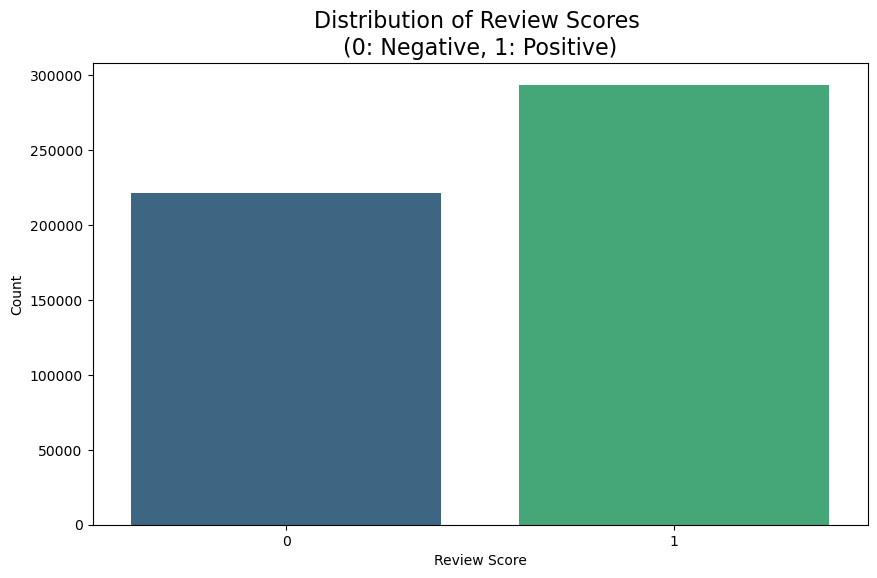

In [15]:
# Create a bar graph to visualize the distribution of 'reviewer_scores' in count
plt.figure(figsize=(10, 6))
sns.countplot(x='Reviewer_Score', data=df, palette='viridis')
plt.title('Distribution of Review Scores \n(0: Negative, 1: Positive)', fontsize = 16)
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

**Interpretation**

This graph effectively visualizes the distribution of **'reviewer_scores'**. It shows that the number of positive reviews (1 with 293,715) is considerably more than the negative ones (0 with 221,484) providing a clear overview of the imbalance between positive and negative reviews in the dataset, which is essential for understanding the data's class distribution.

We will also look at the percentage distribution of our Target variable. 

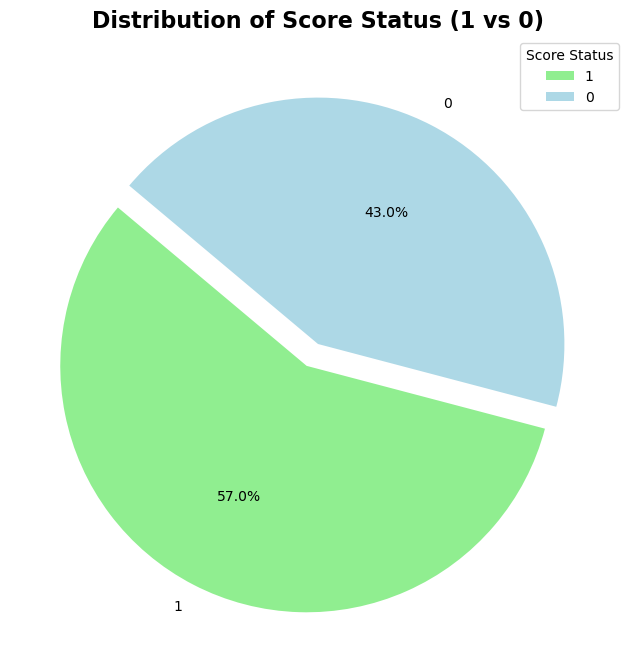

In [16]:
# Group the data by "Reviewer_Score" and count the occurrences
status_counts = df['Reviewer_Score'].value_counts()

# Define colors for the pie chart
colors = ['lightgreen', 'lightblue']

# Specify the 'Default' slice to explode
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Add a legend
plt.legend(status_counts.index, title="Score Status", loc="upper right")

# Set a title
plt.title("Distribution of Score Status (1 vs 0)", fontsize=16, fontweight="bold")

# Display the chart
plt.show()

**Interpretation**

- The **Reviewer Score of 1 (positive sentiment)** represents approximately **57.00%** of the total instances.
- The **Reviewer Score of 0 (negative sentiment)** represents approximately **43.00%** of the total instances.

These findings indicate an **imbalance in the dataset**, with a higher positive reviews compared to the negative ones.

---

After looking and analyzing our target variable, we will move on to other columns/variables in our dataset. 

### Distribution of Other Variables

Our dataset has a lot of other variables namely: 'Day', 'Month', 'Year', 'Days_Since_Review', 'Reviewer Nationality_...' and 'Hotel Addresses_...'. We will be breaking down each of them and visualize them using bar charts and histograms. 


#### 1. 'Day'

In [17]:
# Value counts of 'Day' column.
df['Day'].value_counts()

Day
5     20213
3     19484
15    18326
10    18261
20    18099
17    17671
19    17644
24    17643
27    17625
2     17446
6     17366
16    16957
12    16940
21    16893
1     16833
26    16738
8     16706
22    16455
28    16308
7     16075
13    16000
29    15939
9     15900
14    15817
18    15759
23    15562
25    15235
30    14761
4     14757
11    13952
31    11834
Name: count, dtype: int64

Given the output, we can plot the value counts on a bar graph to have a better visualization of the result.

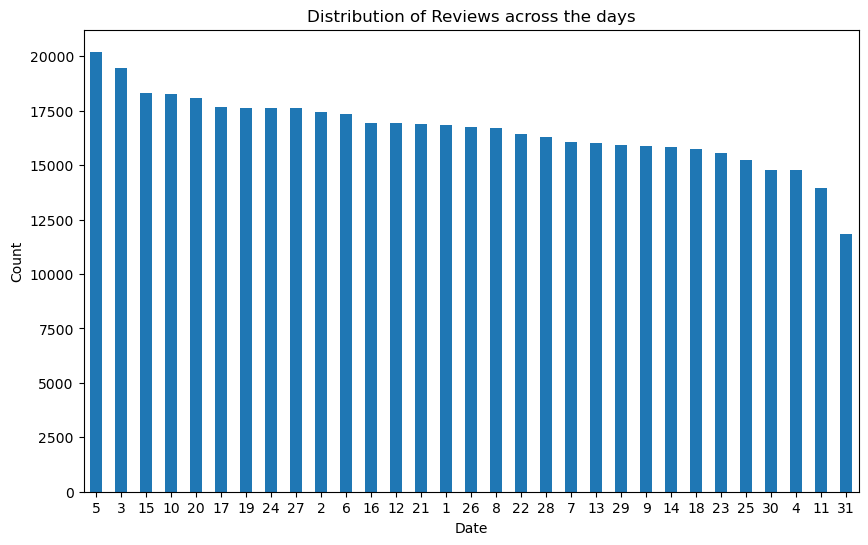

In [18]:
# Create a bar graph showing the distribution of reviews across the days in Months
plt.figure(figsize=(10, 6))
df['Day'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of Reviews across the days')
plt.xticks(rotation=0)
plt.show()

**Interpretation**

The graph provides a count of the ***'Day'*** column values, showing the number of reviews corresponding to each day of the month. 

**Findings**

- **Day 5** has the highest number of reviews at **20,213**. 
- Followed by **day 3** with **19,484** and **day 15** with **18,326**.
- **Day 31** has the lowest number at **11,834**. 

This distribution reveals the varying activity of reviews across different days, which could be further explored for temporal patterns or seasonality in guest feedback.

#### 2. 'Month'

First we have to import 'calender'.

In [19]:
# Count of all the unique values in this column.
df['Month'].value_counts()

Month
8     50611
7     49266
5     46457
10    43773
6     42855
4     42855
9     42341
1     42118
3     41074
12    39573
2     38337
11    35939
Name: count, dtype: int64

This function gives the count of each distinct item in this column. The individual items are months of the year, so in order to visualize the distribution in a better way, we will name all the months and then plot them on a bar graph.

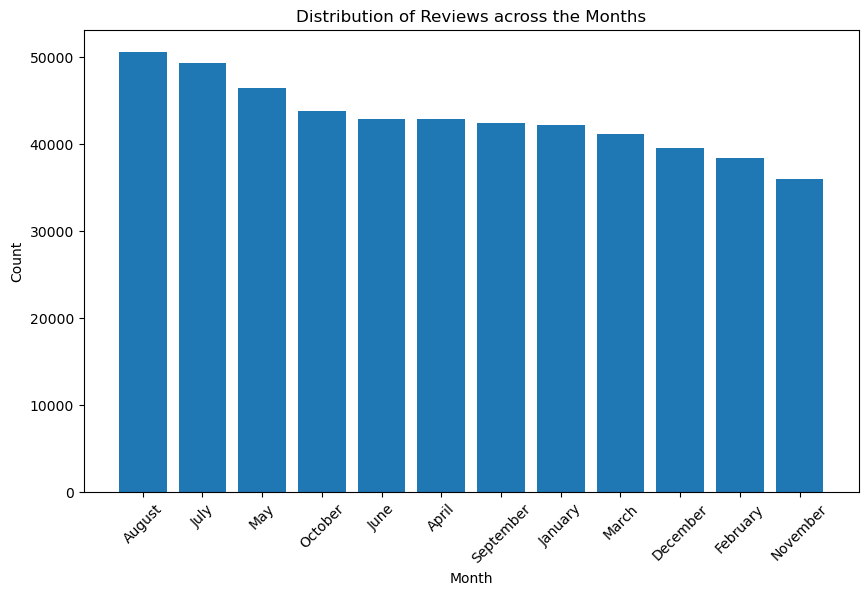

In [20]:
# importing calender
import calendar

# Create a dictionary of all months
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Create a bar graph for showing the distribution of reviews across the Months
plt.figure(figsize=(10, 6))
month_counts = df['Month'].value_counts().sort_values(ascending=False)

# Extract the counts and months
counts = month_counts.values
months = month_counts.index

# Map the month numbers to their names
month_names_list = [month_names[month] for month in months]

plt.bar(month_names_list, counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Reviews across the Months')
plt.xticks(rotation=45)  # Rotate the month names for better readability
plt.show()

##### Methodology

**1. df['Month'].value_counts():** This line counts the number of reviews for each unique month in the 'Month' column.\
**2. import calendar:** The 'calendar' module is imported to help with mapping month numbers to their names.\
**3. month_names = {1: 'January', 2: 'February', ...}:** Created a dictionary to map month numbers to their respective names.\
**4. counts = month_counts.values:** Extracting the review counts for each month.\
**5. months = month_counts.index:** Extracting the months (as numbers) with reviews.\
**6. month_names_list = [month_names[month] for month in months]:** Mapping the month numbers to their names for better readability using a for loop.\
**7. plt.bar(month_names_list, counts):** Creating a bar chart with month names on the x-axis and review counts on the y-axis.

##### Findings


- **Peak Months: August (Month 8), July (Month 7), and May (Month 5)** have the highest number of reviews - **50,611, 49,266 and 46,457 resp.**, suggesting these are popular travel months or peak review periods for hotels.

- **Seasonal Variation:** The distribution indicates a seasonal pattern, with higher review counts in the summer months, particularly **June (Month 6) - 42,855, July, and August**. This pattern aligns with the typical vacation and travel season.

- **Lowest Activity: November (Month 11)** has the lowest number of reviews **35,939** followd by **38,377 in Febuary**, indicating reduced travel or lower hotel stays during this period.

- **Yearly Trend:** The distribution across months can provide insights into annual trends and help our hotel plan for peak periods, potentially adjusting their strategies to accommodate varying levels of guest feedback and demand.

#### 3. Year

In [21]:
# Value counts of each unique item in this column.
df['Year'].value_counts()

Year
2016    264147
2017    156675
2015     94377
Name: count, dtype: int64

Now, we will plot this on a horizontal bar graph.

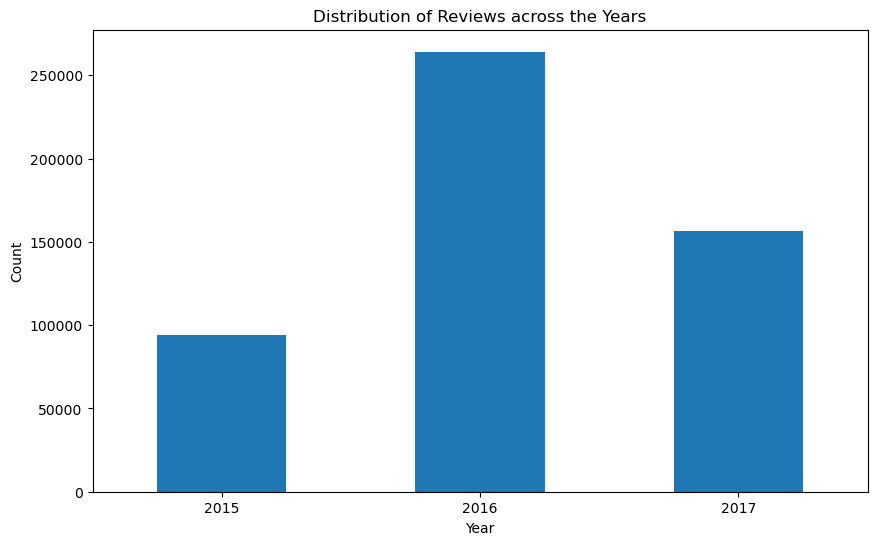

In [22]:
# Create a bar graph for showing the distribution of reviews across years
plt.figure(figsize=(10, 6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Reviews across the Years')
plt.xticks(rotation=0)
plt.show()

#### Findings

The bar graph depicting the distribution of reviews across different years reveals the following findings:

- **Review Trend:** The year **2016** had the highest number of reviews, significantly surpassing other years with **264,147 reviews**. This suggests a peak in review activity during that year.

- **Decline in Reviews:** In contrast, **2017** had a notably lower review count, with **156,675 reviews**, indicating a decrease in feedback activity.

- Earlier Data: The year **2015**, with **94,377 reviews**, represents the earliest data in the dataset and shows a smaller number of reviews compared to subsequent years. This reflects the dataset's progression over time.

The visual representation of reviews across years highlights potential shifts in customer engagement, with the year 2016 standing out as a period of heightened review activity.

#### 4. 'Days_Since_Review'

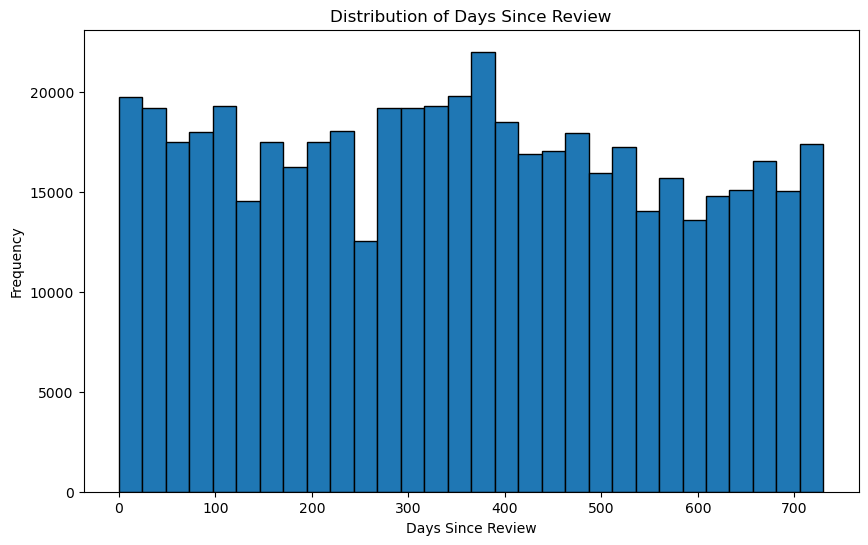

In [23]:
# Create a histogram for days_since_review
plt.figure(figsize=(10, 6))
plt.hist(df['Days_Since_Review'], bins=30, edgecolor='black')
plt.xlabel('Days Since Review')
plt.ylabel('Frequency')
plt.title('Distribution of Days Since Review')
plt.show()

#### Finding

As per this graph, the distribution of days since review is pretty much uniform, day 370 - 390 was maximum and day 250 with minimum.

#### Visualizing our Binary columns 

#### 5. "Reviewer_Nationality_..."

We have 6 columns in our dataset showing the nationality of our reviewers. These are binary columns with 2 dictinct values each - 0 and 1. First, we will use a for loop to see count of their unique values in each column. 

In [24]:
# List of the binary columns.
binary_columns = ["Reviewer_Nationality_Australia", "Reviewer_Nationality_Ireland", "Reviewer_Nationality_UAE",\
                  "Reviewer_Nationality_UK", "Reviewer_Nationality_USA", "Reviewer_Nationality_Other"]

for column in binary_columns:
    print(df[column].value_counts())
    print('-----------------------------')

Reviewer_Nationality_Australia
0    493551
1     21648
Name: count, dtype: int64
-----------------------------
Reviewer_Nationality_Ireland
0    500385
1     14814
Name: count, dtype: int64
-----------------------------
Reviewer_Nationality_UAE
0    504971
1     10228
Name: count, dtype: int64
-----------------------------
Reviewer_Nationality_UK
0    270092
1    245107
Name: count, dtype: int64
-----------------------------
Reviewer_Nationality_USA
0    479850
1     35349
Name: count, dtype: int64
-----------------------------
Reviewer_Nationality_Other
0    327146
1    188053
Name: count, dtype: int64
-----------------------------


`Finding:` This code is designed to explore and display the value counts for a set of binary columns representing reviewer nationalities. It iterates through the specified binary columns, such as "Reviewer_Nationality_Australia" and "Reviewer_Nationality_UK," and prints the count of each unique value (typically 0 or 1). This process provides insight into the distribution of reviewer nationalities in the dataset, helping to understand the diversity of guest origins and their contribution to reviews.


We can use the value counts in these columns and plot all the graphs in a subplot grid of 3 rows and 2 columns. 

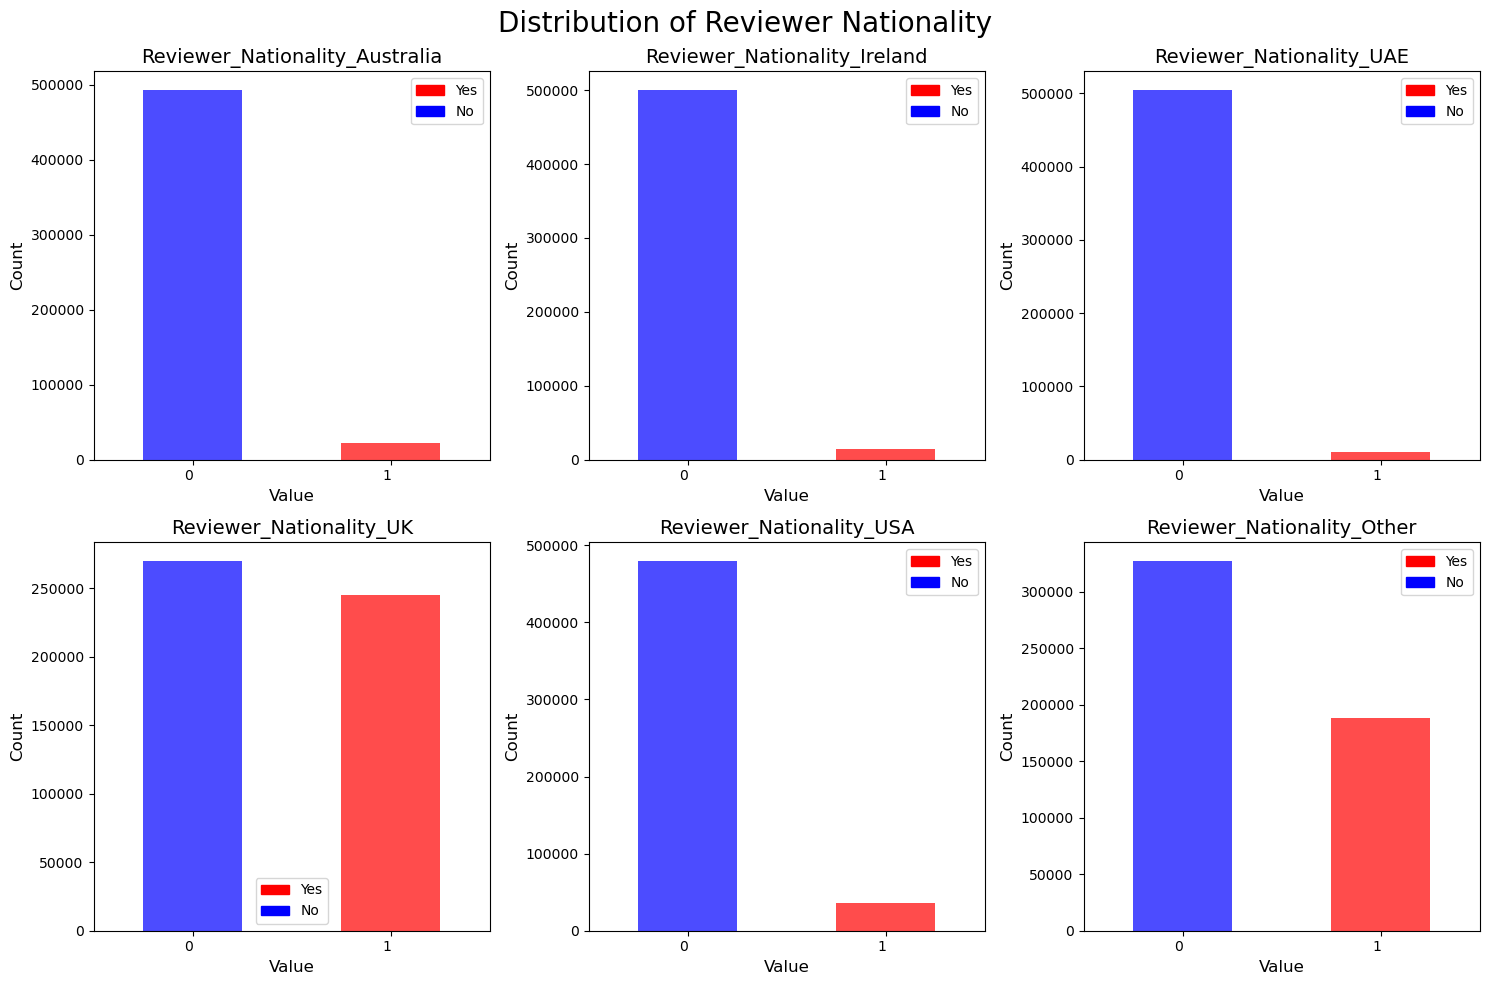

In [25]:
# Define colors for 1 and 0
colors = {1: 'red', 0: 'blue'}

# Create a single figure for all bar charts
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Reviewer Nationality', fontsize=20)

# Loop through binary columns and create bar charts with legend
for i, column in enumerate(binary_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color=[colors.get(value, 'gray') for value in value_counts.index], alpha=0.7)
    plt.title(column, fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=0, ha="right")
    # Create a legend
    legend_labels = {1: "Yes", 0: "No"}
    handles = [plt.Rectangle((0,0),1,1, color=colors[key]) for key in legend_labels]
    plt.legend(handles, [legend_labels[key] for key in legend_labels])
    
plt.tight_layout()
plt.show()

**Methodology**

The above code first defines a list of binary columns, each representing a reviewer's nationality, and iterates through these columns. For each binary column, it prints the value counts (number of 1s and 0s) to show the distribution of reviewers' nationalities in the dataset.

Then, the code proceeds to create a visual representation of the distribution using a subplot grid. It uses a color dictionary to assign colors to the binary values (1 and 0) for each nationality column, with "Yes" and "No" labels as legends.

The code generates a 2x3 grid of subplots, with each subplot displaying a bar chart showing the count of "Yes" (1) and "No" (0) values for a specific nationality. This visualization offers a comprehensive view of the distribution of reviewer nationalities, helping to identify the diversity of nationalities and their contributions to the reviews in the dataset. The title, labels, and legends enhance the interpretability of the graphs.


**Findings**

- **UK Dominance:** The dataset reflects a significant presence of UK-based reviewers, with 245,107 positive reviews originating from the UK. This nationality contributes substantially to the dataset.

- **Diversity of Nationalities:** While the UK has a strong representation, there is also a diverse set of nationalities among reviewers, such as Australia, Ireland, USA, UAE, and others. This diversity indicates the global reach of the hotel's clientele.

- **Review Contribution:** Some nationalities, like Australia and UAE, have a comparatively smaller number of reviews, suggesting fewer reviews from these regions. However, it's essential to consider the scale and representation of different countries when analyzing the data's geographical diversity.

- **Potential Bias:** The varying number of reviews across nationalities may introduce bias in analyses, particularly when exploring reviewer sentiment. Careful consideration of this diversity is important when making inferences or generalizing from the dataset.

#### 6. "Hotel_Address_..."

Our dataset consists of 6 different hotels - Amsterdam, Barcelona, London, Milan, Paris and Vienna. These columns are also binary in nature, meaning they have only 2 unique items in them them, 0 and 1. 

In [26]:
# Defining a list for different Hotel Addresses.
hotel_address_columns = ['Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona', 'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris', 'Hotel_Address_Vienna']

for column in hotel_address_columns:
    print(df[column].value_counts())
    print('-----------------------------')

Hotel_Address_Amsterdam
0    457990
1     57209
Name: count, dtype: int64
-----------------------------
Hotel_Address_Barcelona
0    455051
1     60148
Name: count, dtype: int64
-----------------------------
Hotel_Address_London
1    262293
0    252906
Name: count, dtype: int64
-----------------------------
Hotel_Address_Milan
0    477997
1     37202
Name: count, dtype: int64
-----------------------------
Hotel_Address_Paris
0    455787
1     59412
Name: count, dtype: int64
-----------------------------
Hotel_Address_Vienna
0    476264
1     38935
Name: count, dtype: int64
-----------------------------


In above code, we are exploring and printing the value counts for binary columns that represent different hotel addresses, including Amsterdam, Barcelona, London, Milan, Paris, and Vienna. The code iterates through these columns and prints the count of 1s and 0s. This helps us to understand the distribution of reviews among different hotel locations, providing insights into the popularity and engagement with each hotel.

We can use these counts to plot each column on a subplot grid of 3 x 2. 

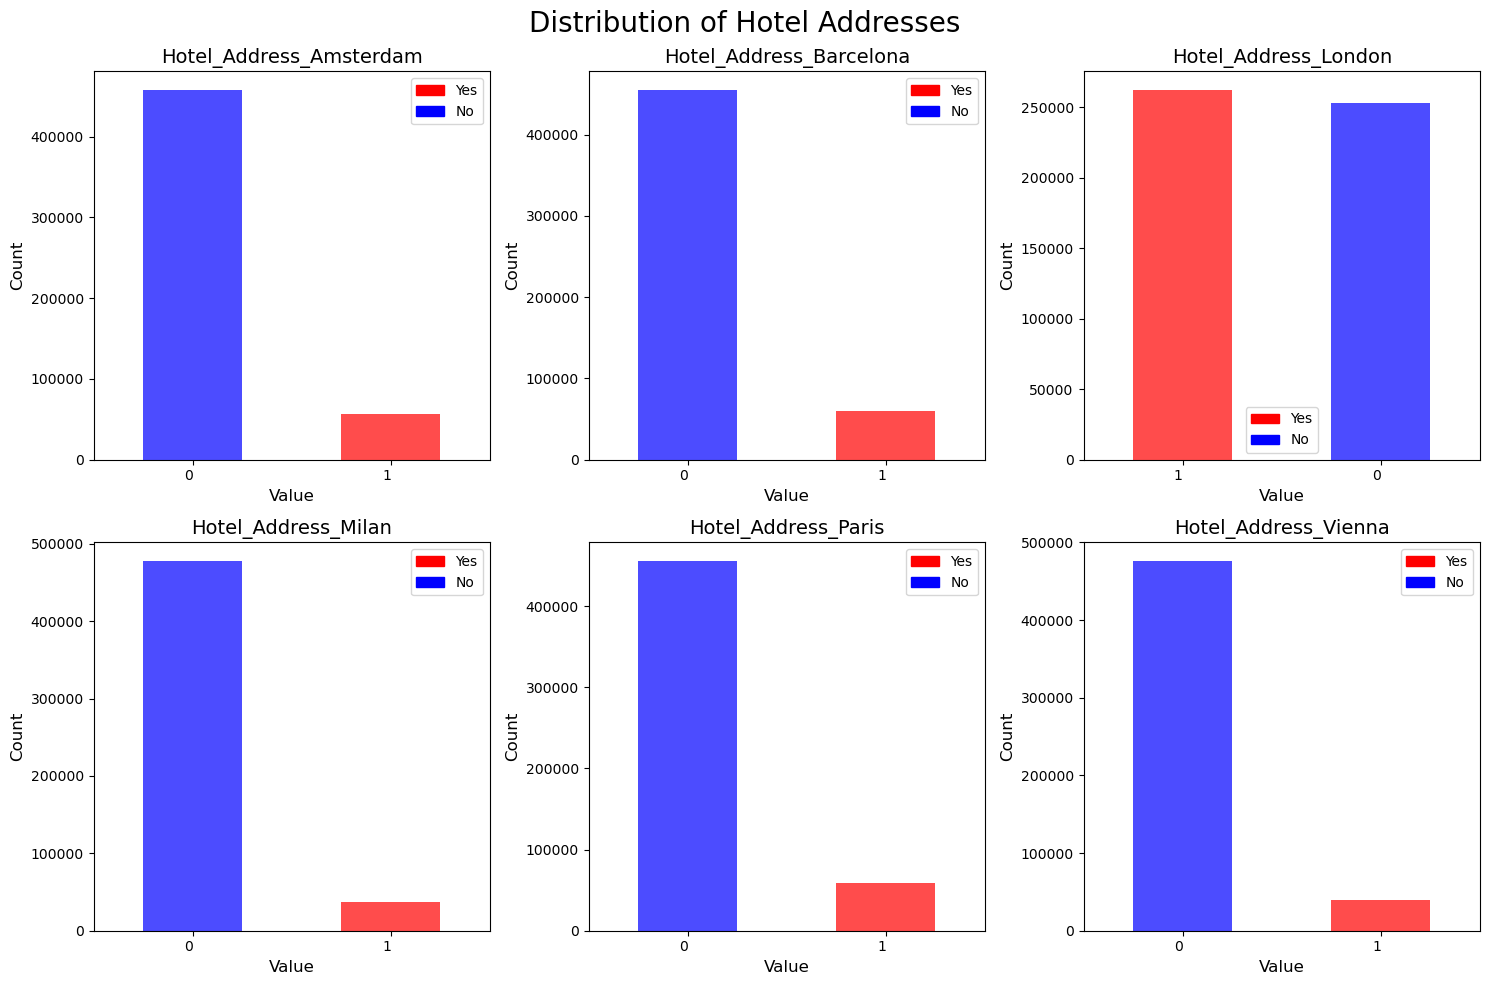

In [27]:
# Define colors for 1 and 0
colors = {1: 'red', 0: 'blue'}

# Create a single figure for all bar charts
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Hotel Addresses', fontsize=20)

# Loop through binary columns and create bar charts with legend
for i, column in enumerate(hotel_address_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color=[colors.get(value, 'gray') for value in value_counts.index], alpha=0.7)
    plt.title(column, fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=0, ha="right")
    # Create a legend
    legend_labels = {1: "Yes", 0: "No"}
    handles = [plt.Rectangle((0,0),1,1, color=colors[key]) for key in legend_labels]
    plt.legend(handles, [legend_labels[key] for key in legend_labels])
    
plt.tight_layout()
plt.show()

**Methodology**

1. The code begins by defining a list, hotel_address_columns, containing binary columns representing different hotel addresses, such as Amsterdam, Barcelona, London, Milan, Paris, and Vienna.

2. It iterates through each binary column and prints the value counts for 1s and 0s, indicating whether a review is associated with a specific hotel address or not.

3. The code then defines a dictionary, colors, to assign colors to the binary values (1 and 0) for better visualization.

4. It creates a single figure for all bar charts, specifying the figure's size and a common title, "Distribution of Hotel Addresses".

5. Within a loop, the code creates individual subplots for each hotel address column. It generates bar charts that display the count of "Yes" (1) and "No" (0) values, with colors assigned based on the colors dictionary.

6. The code labels the subplots with the corresponding hotel address, adjusts the axis labels, and rotates the x-axis labels for readability.

7. To further enhance understanding, it includes a legend with "Yes" and "No" labels and displays the figure with all the bar charts.



**Findings**

- **London Dominance:** Among the specified hotel addresses, London stands out with the highest number of reviews, totaling 262,293. This suggests a strong presence and engagement with this particular location.

- **Diverse Hotel Engagement:** Other major cities like Amsterdam, Barcelona, Milan, Paris, and Vienna also have substantial review counts, indicating a diverse range of hotel engagements across these cities.

- **Other cities:** All the other cities have the review count ranging anywhere between 37,200 and 60,148. 

#### 7. 'Leisure_Trip'

In [28]:
# Value counts in 'Leisure_Trip' column
df['Leisure_Trip'].value_counts()

Leisure_Trip
1    417347
0     97852
Name: count, dtype: int64

`Interpretation`

**df['Leisure_Trip'].value_counts()** - This line calculates and displays the value counts for the 'Leisure_Trip' column. It counts the number of occurrences of each unique value (0 and 1) in the column.

We can display them on a bar graph. For better understanding, we will show the distribution as Percentage out of 100. 

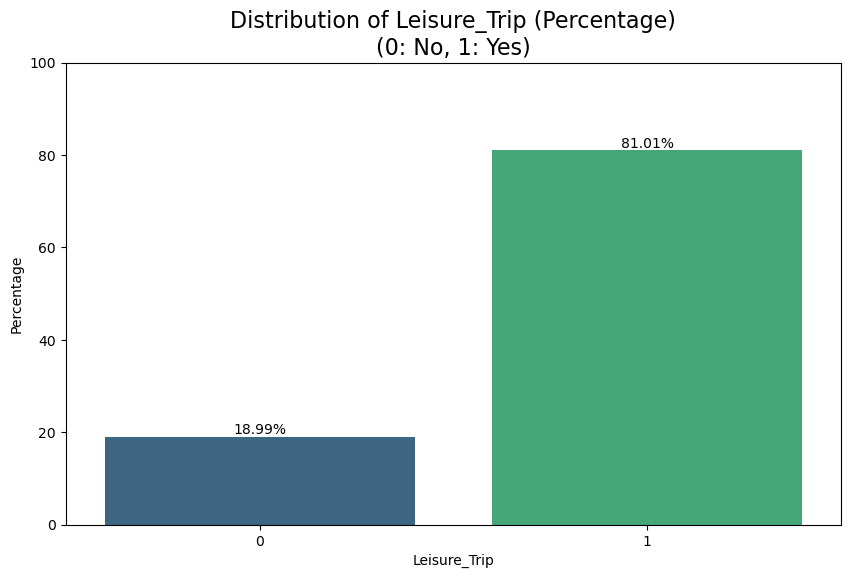

In [29]:
# Convert the value count to percentage
perct_distribution = df['Leisure_Trip'].value_counts(normalize=True) * 100
perct_distribution = perct_distribution.sort_index(ascending=True)


# Create a bar plot for the percentage distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=perct_distribution.index, y=perct_distribution.values, palette='viridis')

# Set the title and axis labels
plt.title('Distribution of Leisure_Trip (Percentage)\n(0: No, 1: Yes)', fontsize=16)
plt.xlabel('Leisure_Trip')
plt.ylabel('Percentage')

# Set the y-axis to display percentages
plt.ylim(0, 100)

# Annotate the bars with their percentage values
for index, value in enumerate(perct_distribution):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

In [30]:
# Print the % of the distribution. 
perct_distribution

Leisure_Trip
0    18.993049
1    81.006951
Name: proportion, dtype: float64

**Methodology**

**1. df['Leisure_Trip'].value_counts()** - This line calculates the value counts for the 'Leisure_Trip' column, as explained earlier, showing the count of each unique value (0 and 1).

**2. perct_distribution = df['Leisure_Trip'].value_counts(normalize=True) * 100** - This line calculates the percentage distribution of the 'Leisure_Trip' variable by dividing the count of each value by the total count and then multiplying by 100 to convert it into percentages.

**3.** The code proceeds to create a **bar plot** using the Seaborn library. It sets the x-axis as the values (0 and 1) of the ***'Leisure_Trip'*** column and the y-axis as the corresponding percentage values. The **'viridis'** color palette is used for the bars.

**4.** The title and axis labels are set to describe the graph. The title includes the distribution of ***'Leisure_Trip'*** with percentage information, and the x-axis represents the 'Leisure_Trip' variable.

**5. plt.ylim(0, 100)** - This line sets the y-axis limits to ensure the percentage values are displayed within the 0-100% range.

**6. for index, value in enumerate(perct_distribution)** - This loop iterates through the percentage values and positions them above their respective bars for better readability.

**7.** Finally, the code displays the bar graph, providing a visual representation of the percentage distribution of 'Leisure_Trip,' helping to understand the proportion of leisure trips within the dataset.

<br>

**Findings**

- **Value Counts:** The ***'Leisure_Trip'*** variable has two unique values, with **1** occurring **417,347 times** and **0** occurring **97,852 times**. This indicates that leisure trips (1) are more prevalent in the dataset.

- **Percentage Distribution:** ***Leisure trips (1)*** constitute approximately **81.00%** of the dataset, while ***non-leisure trips (0)*** make up the remaining **18.99%**. This reveals a substantial prevalence of leisure-related reviews in the dataset

#### 8. 'Nights_Stayed'

Now, we will see how many nights the reviewers stayed in the hotels. We will get value counts of each day and sort them in descending order. 

In [31]:
# Value counts of 'Nights_Stayed' column.
df['Nights_Stayed'].value_counts()

Nights_Stayed
1     193495
2     133997
3      95702
4      47747
5      20818
6       9754
7       7387
8       2498
9       1293
10       887
11       417
12       316
14       247
13       246
15       117
16        57
17        42
18        33
19        29
21        23
20        19
30        11
27        11
23        10
22        10
25         7
28         7
26         7
24         6
29         5
31         1
Name: count, dtype: int64

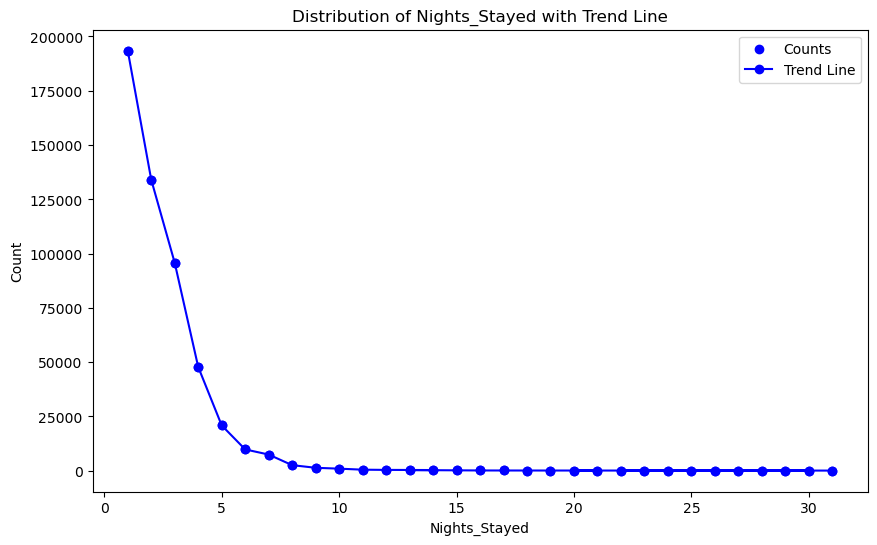

In [32]:
# Create a graph showing the distribution of 'Nights_Stayed'
plt.figure(figsize=(10, 6))
night_counts = df['Nights_Stayed'].value_counts().sort_values(ascending=False)
nights = night_counts.index
counts = night_counts.values

# Plot the scatter points and the line
plt.scatter(nights, counts, color='b', label='Counts')
plt.plot(nights, counts, linestyle='-', marker='o', color='b', label='Trend Line')

plt.xlabel('Nights_Stayed')
plt.ylabel('Count')
plt.title('Distribution of Nights_Stayed with Trend Line')
plt.legend()
plt.show()

**Findings**

- **Dominance of Short Stays:** The majority of reviewers had relatively short stays, with a significant proportion staying for just **one night (193,495 reviews)** and **two nights (133,997 reviews)**.

- **Decline in Frequency:** As the number of nights stayed increases, the frequency of reviews decreases significantly. Longer stays, such as six or more nights, are less common, with the number of reviews tapering off as the duration of the stay extends.

- **Weekend Getaways:** Reviewers who stayed for weekends, indicated by two or three nights, are relatively common, suggesting that leisure travelers may often opt for shorter trips.

- **Insights for Hotels:** The distribution of nights stayed is essential to understand the typical duration of guest visits. It can influence pricing, service offerings, and marketing strategies to cater to the needs of both short-term and longer-term guests.

#### 9. Word Count Distribution for Positive and Negative Reviews

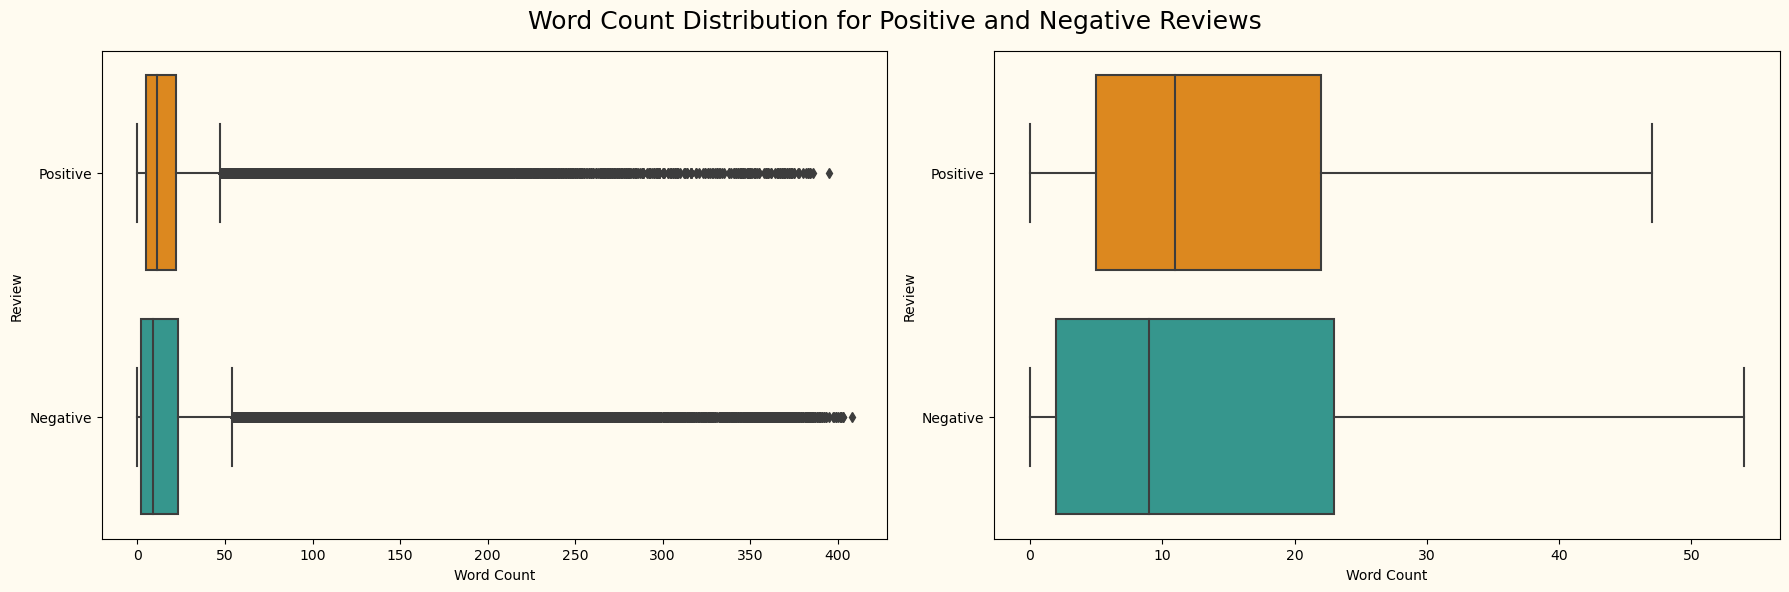

In [33]:
# get the `review word count for positive and negative and add second columns with the outcome
wcpos = pd.DataFrame([])
wcpos['Word Count'] = df['Review_Total_Positive_Word_Counts']
wcpos['Review Outcome'] = 'Positive'
wcneg = pd.DataFrame([])
wcneg['Word Count'] = df['Review_Total_Negative_Word_Counts']
wcneg['Review Outcome'] = 'Negative'

#combine into one dataframe to plot
word_cont_df = pd.concat([wcpos,wcneg])

# set the color pallet for plot
my_pallet = {'Negative': '#26A69A', 'Positive':'#FB8C00'}

# plot the distribution of both word count as box plots
plt.subplots(1,2,figsize = (18,6),facecolor = "#FFFBF0")
ax = plt.subplot(1,2,1)
ax.set_facecolor("#FFFBF0")
sns.boxplot(word_cont_df, x='Word Count' , y= 'Review Outcome', palette = my_pallet)
plt.ylabel('Review')

# same plot without ouliers to get a better look
ax = plt.subplot(1,2,2)
ax.set_facecolor("#FFFBF0")
sns.boxplot(word_cont_df, x='Word Count' , y= 'Review Outcome', palette = my_pallet,showfliers = False)
plt.ylabel('Review')
plt.suptitle('Word Count Distribution for Positive and Negative Reviews',fontsize = 18)
plt.tight_layout()
plt.show()

**Methodology**

**1. Data Extraction:** Word counts for **positive** and **negative** reviews were extracted from the dataset and stored in separate DataFrames, **wcpos and wcneg**. These DataFrames included the **"Word Count" and "Review Outcome" columns** to differentiate between positive and negative reviews.

**2. Data Combination:** The two DataFrames, **wcpos and wcneg**, were concatenated into a single DataFrame named **word_cont_df**. This combined dataset contained word counts and review outcomes for both positive and negative reviews.

**3. Visualization:** Box plots were created to visualize the distribution of word counts for positive and negative reviews. Two subplots were used to compare the distributions with and without outliers. A color palette (my_pallet) was defined to distinguish between positive and negative review outcomes.


<br>

**Findings**

The analysis of word count distributions for positive and negative reviews yielded the following findings:

- **With Outliers** 
> - **Positive Reviews:** The box plot for positive reviews showed that the majority of reviews had a higher word count, with some outliers containing exceptionally long reviews. The interquartile range (IQR) was wider, indicating more variability in word counts among positive reviews.
> - **Negative Reviews:** The box plot for negative reviews displayed a narrower IQR, signifying that negative reviews generally had a smaller word count. There were outliers with longer negative reviews, but they were less common compared to positive reviews.

- **Without Outliers:**

> - After removing outliers, the word count distribution for positive reviews still had a wider IQR compared to negative reviews, demonstrating that positive reviews tend to be longer on average.
> - The absence of outliers in the negative reviews' box plot emphasized that most negative reviews are relatively concise.

---
After doing the EDA, we can now start the Preprocessing of our dataset. 

## Preprocessing <a class="anchor" id="preprocessing"></a>

Dataset preprocessing is an essential phase in data analysis and machine learning that serves multiple key purposes. It ensures data quality by addressing missing or inconsistent values, facilitates feature engineering to enhance model performance, normalizes and standardizes data for algorithm compatibility, and encodes categorical variables for model readiness. Moreover, it reduces noise in the dataset, enabling models to focus on relevant information and improve their generalization. In essence, preprocessing is the foundation for reliable and effective data analysis and modeling.

In [34]:
# Sanity check
df.shape

(515199, 29)

We have **515,199 rows** and **29 columns**. 

### Split the data into Train and Test sets.

In [35]:
# Define the target variable and the feature variables
X = df.drop(columns='Reviewer_Score')     # Feature Variables
y = df['Reviewer_Score']                  # Target Variable

In [36]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
# Check the shape of the train and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (386399, 28)
X_test shape: (128800, 28)
y_train shape: (386399,)
y_test shape: (128800,)


#### Interpretation

The methodology used here is to first define the **Target Variable** and the **Feature Variables**:
- The target variable is **'Reviewer_Score'**, which is what we want to predict.
- The feature variables are **all other columns** in the dataset, which are used to make the prediction.

After defining the target and feature variables, the data is split into a **training set** and a **test set** using the **train_test_split function** from the sklearn library. This function randomly splits the data into training and test sets. The **test_size parameter is set to 0.25**, meaning that **25 %** of the data will be used for the test set, and the **remaining 75%** will be used for the **training set**. The **random_state** parameter is set to a fixed number (**42** in this case) to ensure that the results are reproducible.

This is the output after splitting our dataset:<br>
- **X_train shape:** (386399, 28)<br>
- **X_test shape:** (128800, 28)<br>
- **y_train shape:** (386399,)<br>
- **y_test shape:** (128800,)<br>

The splitting of data into training and test sets is a common practice in machine learning. The training set is used to train the model, and the test set is used to evaluate the model's performance on unseen data. This helps to ensure that the model is not just memorizing the training data, but is actually learning patterns that generalize to new data.

#### Custom Tokenizers

In [38]:
# Download stopwords from NLTK
nltk.download('stopwords')

# Define stopwords for English language
ENGLISH_STOP_WORDS = stopwords.words('english')

# Instantiate PorterStemmer
stemmer = PorterStemmer()

# Define tokenizer function
def my_tokenizer(sentence):
    # Remove punctuation and convert to lowercase
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # Split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # Remove stopwords and empty strings
    for word in listofwords:
        if (word not in ENGLISH_STOP_WORDS) and (word != ''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkaka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Methodology**

- **Download Stopwords from NLTK (natural language processing (NLP) tasks):** The code first downloads a list of stopwords from the NLTK (Natural Language Toolkit) library. Stopwords are common words like "the," "and," "in," etc., that are often removed from text data because they typically don't contribute significant meaning to text analysis.

- **Define Stopwords for English Language:** The code creates a variable named ENGLISH_STOP_WORDS to store the list of stopwords for the English language obtained from NLTK.

- **Instantiate PorterStemmer:** The Porter Stemmer is instantiated as stemmer. It is a common stemming algorithm used to reduce words to their base or root form. Stemming helps in capturing the core meaning of words.

- **Define Tokenizer Function:** The my_tokenizer function is defined to process text. It performs the following tasks:
> - Removes punctuation marks and converts the text to lowercase to ensure uniformity.
> - Splits the text into a list of words.
> - Iterates through the list of words, removing stopwords (common, non-informative words) and empty strings.
> - Stems each remaining word using the Porter Stemmer.
> - Returns a list of stemmed words that have been preprocessed and are ready for further NLP analysis.

Now that we have Tokenized, we wil transform the **Positive** and **Negative** review columns using a **CountVectorizer**. While using the vectorizer, we will set the **maximize the number of features at 500** and make sure that **words or tokens used less than 10 times are dropped** from the vocabulary. We will work on the positive and negative review columns seperately. 

First, we will start with our **Positive Train and Test data**.

#### Positive Matrix

#### Train Data

In [39]:
# Instantiate CountVectorizer with tokenizer
bagofwords = CountVectorizer(min_df=10, tokenizer=my_tokenizer, max_features=500)

## Vectorize the Positive_Review columns
# Fit
bagofwords.fit(X_train['Positive_Review'])

# Transform
positive_matrix_train = bagofwords.fit_transform(X_train['Positive_Review'])
positive_matrix_train

<386399x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2931140 stored elements in Compressed Sparse Row format>

In [40]:
# these are now the features, they are the individual tokens
bagofwords.get_feature_names_out()

array(['1', '10', '15', '2', '20', '3', '30', '4', '5', 'abl', 'absolut',
       'access', 'accommod', 'across', 'afternoon', 'air', 'airport',
       'allow', 'almost', 'also', 'although', 'alway', 'amaz', 'ambienc',
       'amen', 'amsterdam', 'anniversari', 'anoth', 'anyth', 'apart',
       'appoint', 'appreci', 'area', 'around', 'arriv', 'ask',
       'atmospher', 'attent', 'attract', 'avail', 'away', 'awesom',
       'back', 'bad', 'bag', 'balconi', 'bar', 'barcelona', 'bath',
       'bathroom', 'beach', 'beauti', 'bed', 'bedroom', 'best', 'better',
       'big', 'birthday', 'bit', 'block', 'bonu', 'book', 'bottl',
       'boutiqu', 'breakfast', 'brilliant', 'bu', 'buffet', 'build',
       'busi', 'cafe', 'cake', 'call', 'came', 'canal', 'car', 'card',
       'care', 'center', 'centr', 'central', 'chang', 'charg', 'charm',
       'check', 'chocol', 'choic', 'choos', 'citi', 'class', 'clean',
       'cleanli', 'close', 'club', 'cocktail', 'coffe', 'cold', 'come',
       'comfi', 'c

In [41]:
# converting the sparse matrix into a numpy array
positive_matrix_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
positive_df_train = pd.DataFrame(positive_matrix_train.toarray(), columns=bagofwords.get_feature_names_out())

# Check the shape 
positive_df_train.shape             

(386399, 500)

There are **386,399 rows** and **500 columns** in the **'positive_df_train'** dataframe. 

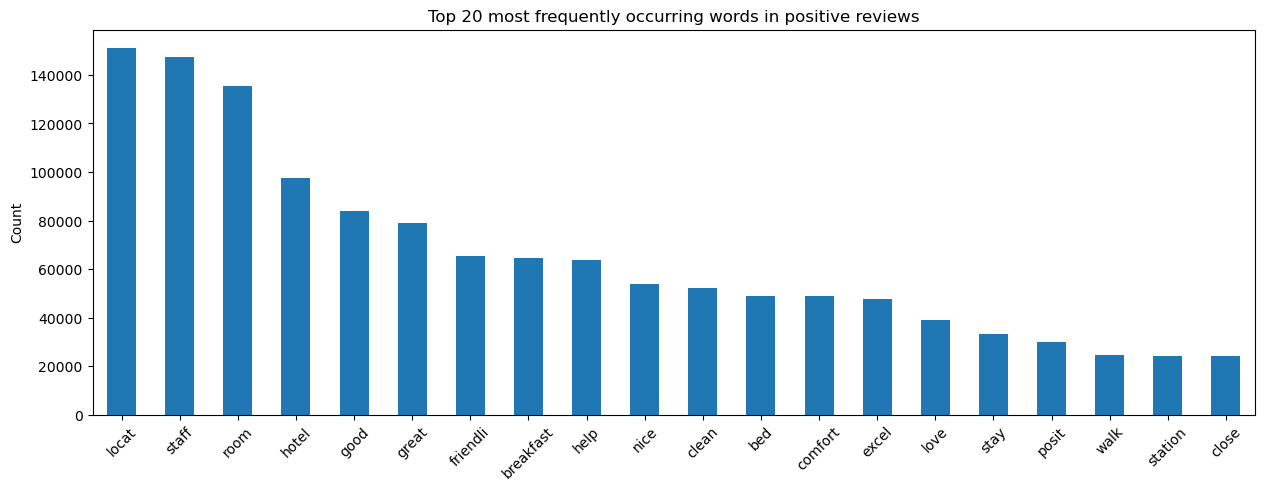

In [91]:
# Create DataFrame for word counts
word_counts_pos = pd.DataFrame(
    {'counts': positive_matrix_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

# Plot top 20 most frequently occurring words
word_counts_pos.head(20).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Top 20 most frequently occurring words in positive reviews')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [99]:
# Print out the top 20 positive words
word_counts_pos.head(20)

,counts
locat,151034
staff,147203
room,135615
hotel,97442
good,84082
great,79126
friendli,65361
breakfast,64788
help,63778
nice,53694


**Methodology**

**1. CountVectorizer with Tokenizer:** The process begins by instantiating a CountVectorizer with specific parameters. **min_df=10** sets the minimum document frequency for tokens to 10, meaning tokens used less than 10 times are dropped from the vocabulary. **max_features=500** limits the maximum number of features to 500. Additionally, a custom tokenizer function (my_tokenizer) is used to preprocess and tokenize the text data.

**2. Vectorization:** The vectorizer is fitted to the ***"Positive_Review"*** column of the training data (X_train['Positive_Review']). This process converts the text data into a numerical representation, where each feature corresponds to a token. The resulting matrix, positive_matrix_train, is the vectorized representation of the positive reviews.

**3. Data Transformation:** The sparse matrix **(positive_matrix_train)** is converted into a dense NumPy array, and then a DataFrame **(positive_df_train)** is created to present the information in a structured format.

**4. Word Counts:** A DataFrame (word_counts) is constructed to store the word counts of individual tokens. The word counts are calculated by summing the occurrences of each token across all positive reviews.

**5. Data Visualization:** A bar chart is created to visualize the top 20 most frequently occurring words in positive reviews. The chart displays the word counts for each word, providing insights into the most common words in positive reviews.


<br>

**Findings**

The analysis of the top 20 most frequently occurring words in positive reviews reveals the following findings:

- **Frequent Words:** The most common words in positive reviews are associated with positive sentiments and often reflect features and aspects of accommodations like **"location", "staff", "room", "hotel", and "good"** are among the top frequently occurring words.
- **Service and Amenities:** The presence of words like **"breakfast", "help", and "nice"** indicates that reviewers often mention the quality of service and amenities in a positive context.
- **Location and Convenience:** Words such as **"location", "walk", "station", and "close"** highlight the importance of the hotel's location and proximity to transportation.



Now we will transform out **Positive Test Data**.

#### Test Data

In [44]:
# Transform the test set
positive_matrix_test = bagofwords.transform(X_test['Positive_Review'])
positive_matrix_test

<128800x500 sparse matrix of type '<class 'numpy.int64'>'
	with 979422 stored elements in Compressed Sparse Row format>

In [45]:
# converting the sparse matrix into a numpy array
positive_matrix_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
positive_df_test = pd.DataFrame(positive_matrix_test.toarray(), columns=bagofwords.get_feature_names_out())

# Check the shape
positive_df_test.shape            

(128800, 500)

We have **128,800 rows** and **500 columns** in our **'positive_df_test'** dataframe. 

Next, we will move on to transform our **Negative Train and Test data**.

#### Negative Matrix

#### Train Data

In [47]:
# Instantiate CountVectorizer with tokenizer
bagofwords1 = CountVectorizer(min_df=10, tokenizer=my_tokenizer, max_features=500)

## Vectorize the Negative_Review columns
# Fit
bagofwords1.fit(X_train['Negative_Review'])

# Transform
negative_matrix_train = bagofwords1.fit_transform(X_train['Negative_Review'])
negative_matrix_train

<386399x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2346703 stored elements in Compressed Sparse Row format>

In [48]:
# these are now the features, they are the individual tokens
bagofwords1.get_feature_names_out()

array(['00', '1', '10', '12', '15', '2', '20', '3', '30', '4', '5', '50',
       '6', '7', '8', 'abl', 'absolut', 'ac', 'access', 'actual', 'addit',
       'advertis', 'air', 'airport', 'almost', 'alreadi', 'also',
       'although', 'alway', 'amount', 'annoy', 'anoth', 'anyth', 'apart',
       'area', 'around', 'arriv', 'ask', 'avail', 'averag', 'aw', 'away',
       'back', 'bad', 'bag', 'bar', 'basement', 'basic', 'bath',
       'bathroom', 'bed', 'bedroom', 'best', 'better', 'big', 'bigger',
       'bill', 'bit', 'block', 'book', 'bottl', 'breakfast', 'broken',
       'buffet', 'build', 'busi', 'call', 'came', 'car', 'card', 'care',
       'carpet', 'case', 'center', 'centr', 'central', 'chair', 'chang',
       'channel', 'charg', 'check', 'choic', 'citi', 'clean', 'cleaner',
       'clear', 'close', 'cloth', 'coffe', 'cold', 'com', 'come',
       'comfort', 'compar', 'complain', 'complaint', 'complet',
       'complimentari', 'con', 'condit', 'connect', 'consid', 'construct',
     

In [49]:
# converting the sparse matrix into a numpy array
negative_matrix_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
negative_df_train = pd.DataFrame(negative_matrix_train.toarray(), columns=bagofwords1.get_feature_names_out())

# Check the shape
negative_df_train.shape  

(386399, 500)

There are **386,399 rows and 500 columns** in our dataframe **'negative_df_train'**.

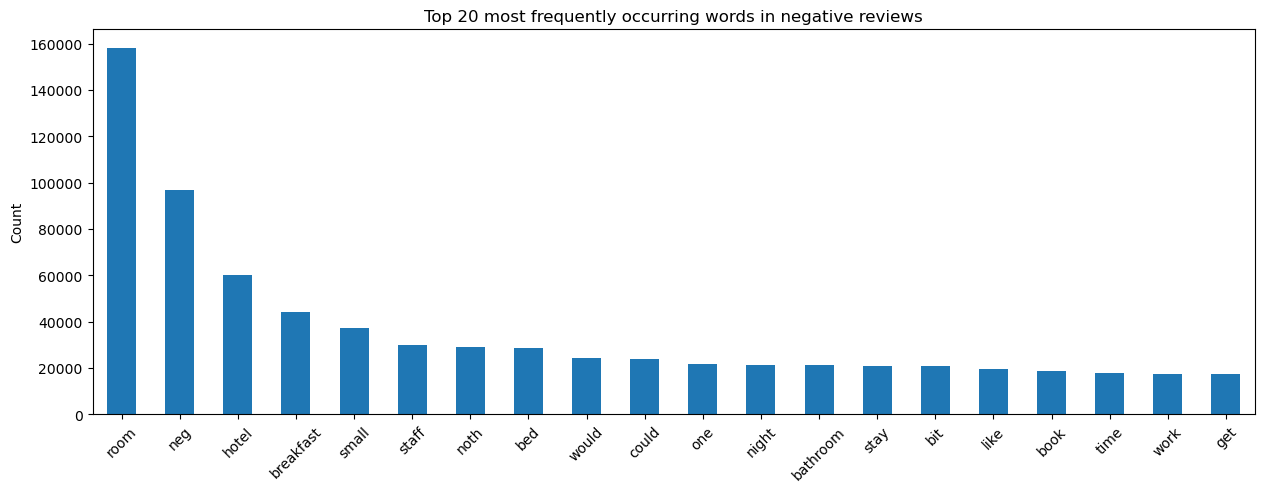

In [102]:
# Create DataFrame for word counts
word_counts = pd.DataFrame(
    {'counts': negative_matrix_train.toarray().sum(axis=0)},
    index=bagofwords1.get_feature_names_out()
).sort_values("counts", ascending=False)

# Plot top 20 most frequently occurring words
word_counts.head(20).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Top 20 most frequently occurring words in negative reviews')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [104]:
# Print the top 20 Negative words with counts
word_counts.head(20)

,counts
room,158257
neg,97009
hotel,60150
breakfast,44200
small,37395
staff,29945
noth,29039
bed,28623
would,24305
could,24012


**Methodology**

We are repeating the steps we did for out Positive Training data.

<br>

**Findings**

- **Room:** A frequently mentioned term in both positive and negative reviews, highlighting its importance and common issues related to comfort, cleanliness, or size.
- **Hotel:** A common reference in both positive and negative reviews, encompassing aspects like location, service, and the overall establishment.
- **Breakfast:** Appears in both contexts, indicating satisfaction with breakfast quality in positive reviews and potential disappointment in negative ones.
- **Staff:** Referenced in both positive and negative reviews, reflecting interactions with helpful staff in positive cases and service issues in negative cases.
- **Bed:** A recurring term in both positive and negative reviews, potentially signifying comfort or quality concerns with beds.
- **Bathroom:** A notable term in both positive and negative reviews, signaling potential issues or satisfaction with bathroom facilities.
- Negative sentiment words like **"neg", "noth", "bit", "like", "could"** and **"would"** indicate the frequent expression of negative sentiments or complaints in reviews.
- Terms like **"small"** and **"bit** are associated with concerns about room size and space in negative reviews.
- Words such as **"night", "book"** and **"bathroom"** point to specific problem areas or occurrences mentioned in negative reviews.
- Words like **"could", "would"** and **"like"** may suggest a critical or less-than-satisfied tone often found in negative reviews.

Now, we transform our test data.

#### Test Data

In [52]:
# Transform the test set
negative_matrix_test = bagofwords1.transform(X_test['Negative_Review'])
negative_matrix_test

<128800x500 sparse matrix of type '<class 'numpy.int64'>'
	with 778513 stored elements in Compressed Sparse Row format>

In [53]:
# converting the sparse matrix into a numpy array
negative_matrix_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
negative_df_test = pd.DataFrame(negative_matrix_test.toarray(), columns=bagofwords1.get_feature_names_out())

# Check the shape
negative_df_test.shape  

(128800, 500)

The **'negative_df_test'** dataframe contains **128,800 rows** and **500 columns**.

Before we combine our Numeric Datasets to the Dataframes we have made, we will add prefixes to our dataframes:
- **'pos_'** -----> **'positive_df_train'** and **'positive_df_test'**
- **'neg_'** -----> **'negative_df_train'** and **'negative_df_test'**

In [55]:
# Add prefix to the words --> 'pos_' to postive words in dataframes and 'neg_' to the negative ones in dataframes.
positive_df_train = positive_df_train.add_prefix("pos_")
negative_df_train = negative_df_train.add_prefix("neg_")      

positive_df_test = positive_df_test.add_prefix("pos_")
negative_df_test = negative_df_test.add_prefix("neg_")

In [56]:
# Sanity check the dataframe to ensure prefized are added properly.
positive_df_train.head()

,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_entranc,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price,pos_problem,pos_profession,pos_properti,pos_provid,pos_proxim,pos_pub,pos_public,pos_qualiti,pos_quick,pos_quiet,pos_quirki,pos_quit,pos_rambla,pos_rate,pos_reach,pos_readi,pos_real,pos_realli,pos_reason,pos_recept,pos_receptionist,pos_recommend,pos_relax,pos_renov,pos_request,pos_restaur,pos_return,pos_right,pos_river,pos_road,pos_roof,pos_rooftop,pos_room,pos_round,pos_safe,pos_say,pos_second,pos_secur,pos_see,pos_seem,pos_select,pos_serv,pos_servic,pos_set,pos_sever,pos_shop,pos_short,pos_shower,pos_side,pos_sight,pos_sightse,pos_singl,pos_site,pos_situat,pos_size,pos_sleep,po

#### Numeric Data

In [57]:
# drop the review collumns for X dataset
X_train.drop(columns =['Positive_Review','Negative_Review'], inplace= True)
X_test.drop(columns =['Positive_Review','Negative_Review'], inplace= True)

In [58]:
# reset index of X to prevent Nan Values when combining
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

#### Combine

In [59]:
# Combine the numeric columns to the dataframes.
X_train_combined = pd.concat([X_train, positive_df_train, negative_df_train], axis=1)
X_test_combined = pd.concat([X_test,positive_df_test, negative_df_test],axis=1)

In [60]:
# Sanity check to ensure that the concatination has worked properly.
X_train_combined.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_entranc,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price,pos_problem,pos_profession,pos_propert

**Methodology**

1. **Dropping Review Columns:** The process begins by removing the **"Positive_Review"** and **"Negative_Review"** columns from the **training and testing datasets (X_train and X_test)**. This step is essential as these text columns have been processed and transformed into numerical representations, and they are no longer needed in their original text form.

2. **Resetting Index:** The index of both the training and testing datasets is reset using the **reset_index** method with the **drop=True** parameter. This is done to reset the index to a continuous sequence of integers, preventing any issues related to missing or NaN (Not a Number) values when combining the datasets in the next step.

3. **Combining Datasets:** The **transformed text data** is concatenated with the **dataframes** created earlier. This combination results in two new datasets, **X_train_combined** and **X_test_combined**, which include the original features from the training and testing datasets along with the processed text data.

4. **Output:** The **X_train_combined** dataset is presented as part of the methodology to illustrate the result of combining the text data with the original features.

This methodology outlines the steps taken to remove unnecessary text columns, reset the index, and combine the transformed text data with the main datasets, preparing the data for modeling.

-----------------------------------------

## Modelling <a class="anchor" id="modelling"></a>

As the data is now ready for modelling, we will be creating two separate models - **LOGISTIC REGRESSION MODEL** and **DECISION TREE MODEL**.

In [62]:
# From sklearn, import the following.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time

In [63]:
# Print out the rows and columns.
print(f'X_train_combined shape: {X_train_combined.shape}')
print(f'X_test_combined shape: {X_test_combined.shape}')

print('------------------------------------')

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train_combined shape: (386399, 1026)
X_test_combined shape: (128800, 1026)
------------------------------------
y_train shape: (386399,)
y_test shape: (128800,)


### Logistic Model <a class="anchor" id="logistic"></a>

We will run a Logistic model on the Unscaled data.

In [64]:
# Instantiate the model
review_logit = LogisticRegression()

# Fit the model
review_logit.fit(X_train_combined, y_train)

# Training and test score
print(f"Train score: {review_logit.score(X_train_combined, y_train)}")
print(f"Test score: {review_logit.score(X_test_combined, y_test)}")

Train score: 0.7250821042497522
Test score: 0.727414596273292


**Methodology**                                     

**1. Instantiate the logistic regression model** with the LogisticRegression class.\
**2. Fit the logistic regression model** using the training data (X_train_combined and y_train).\
**3.** Print out the **accuracy scores for the Training and Testing datasets**.

<br>

**Interpretation:**

The logistic regression model was trained and evaluated using the combined training and test data. Here are the findings:

- The **Training score**, which represents the accuracy of the model on the training data, is approximately **72.51%**. 
- The **Test score**, which indicates the accuracy of the model on unseen data, is approximately **72.74%**.
- The model's performance on both the training and test datasets is quite similar, suggesting that it generalizes reasonably well to new data. 

#### We will identify the top 20 words from positive reviews predictive of a positive sentiment (Reviewer_Score = 1) and the top 20 words from negative reviews predictive of a negative sentiment (Reviewer_Score = 0) using the entire dataset. <a class="anchor" id="prescaledTop20"></a>

#### Before Scaling

In [66]:
# Get the feature names
feature_names = X_train_combined.columns

# Get the coefficients of the logistic regression model
coefficients = review_logit.coef_

# Create a DataFrame to store the feature names and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Filter features that start with 'pos_' for positive words
positive_words_df = coef_df[coef_df['Feature'].str.startswith('pos_')]

# Sort the DataFrame by coefficients for positive sentiment (Reviewer_Score = 1)
top_positive_words_before_scaling = positive_words_df.sort_values(by='Coefficient', ascending=False).head(20)

# Filter features that start with 'neg_' for positive words
negative_words_df = coef_df[coef_df['Feature'].str.startswith('neg_')]

# Sort the DataFrame by coefficients for negative sentiment (Reviewer_Score = 0)
top_negative_words_before_scaling = negative_words_df.sort_values(by='Coefficient').head(20)

# Actionable insights for positive sentiment
print("Top 20 words for positive sentiment:")
print(top_positive_words_before_scaling)

print("_____________________________________")

# Actionable insights for negative sentiment
print("\nTop 20 words for negative sentiment:")
print(top_negative_words_before_scaling)

Top 20 words for positive sentiment:
          Feature  Coefficient
433     pos_staff     0.057780
231     pos_great     0.035691
183     pos_excel     0.029662
216  pos_friendli     0.025279
289      pos_love     0.024763
239      pos_help     0.022653
181   pos_everyth     0.021551
125   pos_comfort     0.015886
48       pos_amaz     0.014545
396      pos_room     0.013471
246     pos_hotel     0.013442
345   pos_perfect     0.011451
406    pos_servic     0.010271
438      pos_stay     0.010119
198   pos_fantast     0.009754
77     pos_beauti     0.009753
78        pos_bed     0.007485
116     pos_clean     0.007261
381    pos_realli     0.006366
520    pos_wonder     0.006319
_____________________________________

Top 20 words for negative sentiment:
           Feature  Coefficient
898       neg_room    -0.071460
929      neg_small    -0.030009
576        neg_bed    -0.015742
942      neg_staff    -0.013642
575   neg_bathroom    -0.012329
862       neg_poor    -0.012015
837        n

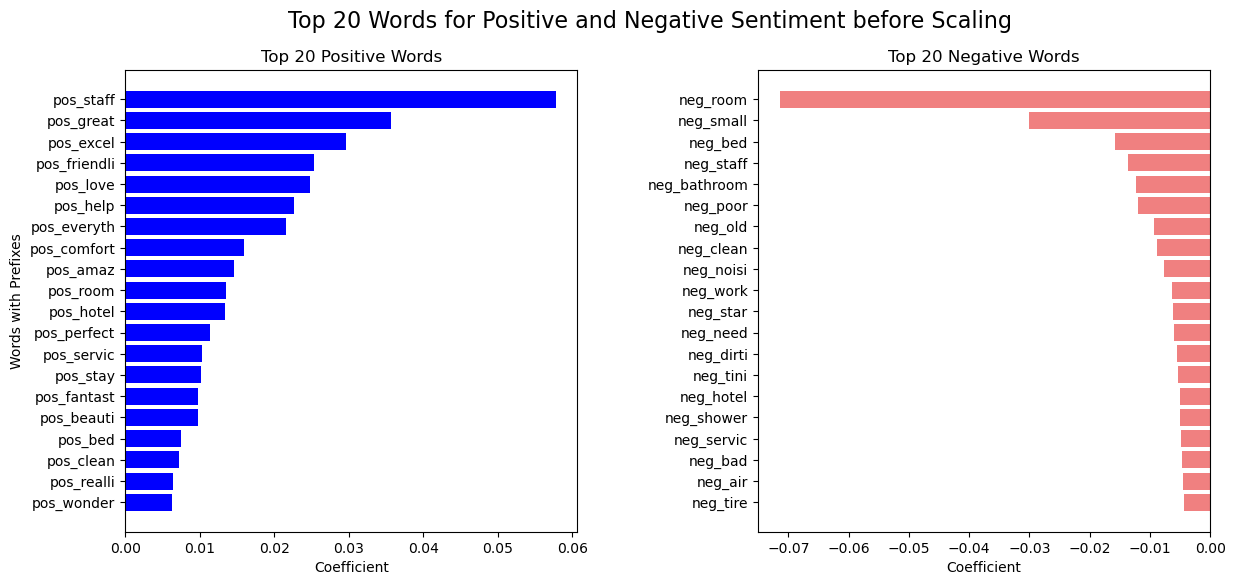

In [67]:
# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Plot top positive words
axs[0].barh(top_positive_words_before_scaling['Feature'], top_positive_words_before_scaling['Coefficient'], color='blue')
axs[0].set_xlabel("Coefficient")
axs[0].set_ylabel("Words with Prefixes")
axs[0].set_title("Top 20 Positive Words")
axs[0].invert_yaxis()

# Plot top negative words
axs[1].barh(top_negative_words_before_scaling['Feature'], top_negative_words_before_scaling['Coefficient'], color='lightcoral')
axs[1].set_xlabel("Coefficient")
axs[1].set_title("Top 20 Negative Words")
axs[1].invert_yaxis()

fig.suptitle("Top 20 Words for Positive and Negative Sentiment before Scaling", fontsize=16)
plt.subplots_adjust(wspace=0.4) 
plt.show()

**Methodology**

**1. Feature Extraction:** The methodology begins with the extraction of feature names from the combined dataset (X_train_combined) that includes both text features and original features. These text features represent the word counts from positive and negative reviews with appropriate prefixes.\
**2. Coefficients Calculation:** The coefficients of a logistic regression model, which was trained on the dataset, are obtained. These coefficients represent the predictive importance of each feature (word) in determining the sentiment of the reviews (Reviewer_Score = 1 or 0).\
**3. DataFrame for Coefficients:** A DataFrame (coef_df) is created to store the feature names and their corresponding coefficients. This DataFrame provides an organized structure to work with the coefficient information.\
**4. Positive Words Extraction:** Features that start with the prefix 'pos_' are selected, indicating words from positive reviews. These features are filtered from the DataFrame based on their feature names.\
**5. Sorting for Positivity:** The DataFrame containing positive words is sorted by coefficients in descending order to identify the top 20 words that are most predictive of a positive sentiment (Reviewer_Score = 1).\
**6. Negative Words Extraction:** Features that start with the prefix 'neg_' are selected, representing words from negative reviews. These features are filtered based on their feature names.\
**7. Sorting for Negativity:** The DataFrame containing negative words is sorted by coefficients in ascending order to identify the top 20 words that are most predictive of a negative sentiment (Reviewer_Score = 0).\
**8. Data Visualization:** Subplots are created to display the top 20 positive and negative words before feature scaling. Two horizontal bar graphs are generated, showcasing the words and their corresponding coefficients. The coefficient values are shown on the horizontal axis to provide insights into the predictive power of each word.\
**9. Insight Presentation:** The findings are presented, including the top 20 words for positive and negative sentiment before feature scaling.

<br>

**Findings**

**1. Positive Sentiment Drivers:**

- **Staff (Coefficient: 0.057780):** Positive mentions of hotel staff have the highest influence on positive sentiment, highlighting the pivotal role of friendly and helpful staff in guest satisfaction.
- **Great (Coefficient: 0.035691)** and **Excellent (Coefficient: 0.029662):** Words like "great" and "excellent" carry strong positive coefficients, indicating their substantial impact on positive sentiment, reflecting the importance of - excellence and greatness in reviews.
- **Love (Coefficient: 0.024763):** The word "love" signifies high levels of satisfaction and emotional connection, contributing positively to sentiment.
- **Comfort (Coefficient: 0.015886):** Positive references to "comfort" highlight the significance of comfortable accommodations in driving positive sentiment.


**2. Negative Sentiment Drivers:**

- **Room (Coefficient: -0.071460):** Negative feedback related to "room" is the most influential driver of negative sentiment, suggesting that issues or complaints about rooms significantly impact the overall experience.
- **Small (Coefficient: -0.030009):** Concerns about room size, indicated by "small" are prevalent in negative reviews and contribute to negative sentiment.
- **Bed (Coefficient: -0.015742):** Negative mentions of "bed" reflect discomfort or quality issues, negatively affecting sentiment.
- **Staff (Coefficient: -0.013642):** Negative feedback about hotel staff suggests service-related concerns.
- **Bathroom (Coefficient: -0.012329):** Issues related to the bathroom facility can play a role in generating negative sentiment.

---

**Once again, we will identify the top 20 words from positive and negative reviews predictive of a positive sentiment (Reviewer_Score = 1) and the negative sentiment (Reviewer_Score = 0), but this time, we will be sacling our data using a Standard Scaler. Scaling data is essential in machine learning to:**

- Ensure features have similar scales, preventing bias towards certain features.
- Enhance convergence speed and model performance.
- Enable accurate interpretation, regularization, and robustness,

#### Scaling the Data

In [68]:
# Create a StandardScaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train_combined)

# Transform the training and test data
X_train_transformed = scaler.transform(X_train_combined)
X_test_transformed = scaler.transform(X_test_combined)

Train score after Scaling: 0.7957655169915036
Test score after Scaling: 0.7952018633540373


#### After Scaling, filter the top 20 names.

In [69]:
# Get the feature names from the CountVectorizer
feature_names = X_train_combined.columns

# Get the coefficients of the logistic regression model
coefficients = review_logit_standard.coef_

# Create a DataFrame to store the feature names and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Filter features that start with 'pos_' for positive words
positive_words_df = coef_df[coef_df['Feature'].str.startswith('pos_')]

# Sort the DataFrame by coefficients for positive sentiment (Reviewer_Score = 1)
top_positive_words = positive_words_df.sort_values(by='Coefficient', ascending=False).head(20)

# Filter features that start with 'neg_' for positive words
negative_words_df = coef_df[coef_df['Feature'].str.startswith('neg_')]

# Sort the DataFrame by coefficients for negative sentiment (Reviewer_Score = 0)
top_negative_words = negative_words_df.sort_values(by='Coefficient').head(20)

# Actionable insights for positive sentiment
print("Top 20 words for positive sentiment:")
print(top_positive_words)

print("_____________________________________")

# Actionable insights for negative sentiment
print("\nTop 20 words for negative sentiment:")
print(top_negative_words)

Top 20 words for positive sentiment:
           Feature  Coefficient
181    pos_everyth     0.297107
183      pos_excel     0.235008
433      pos_staff     0.204552
231      pos_great     0.203857
48        pos_amaz     0.194540
345    pos_perfect     0.168732
289       pos_love     0.150853
198    pos_fantast     0.146158
77      pos_beauti     0.125328
520     pos_wonder     0.113255
125    pos_comfort     0.109852
489     pos_troubl     0.105784
406     pos_servic     0.093287
451     pos_superb     0.092465
179      pos_everi     0.089146
91   pos_brilliant     0.084340
193      pos_fabul     0.083997
147    pos_definit     0.083218
438       pos_stay     0.081539
239       pos_help     0.078800
_____________________________________

Top 20 words for negative sentiment:
           Feature  Coefficient
898       neg_room    -0.259675
942      neg_staff    -0.188649
862       neg_poor    -0.133937
656      neg_dirti    -0.128456
929      neg_small    -0.125155
946       neg_star    -

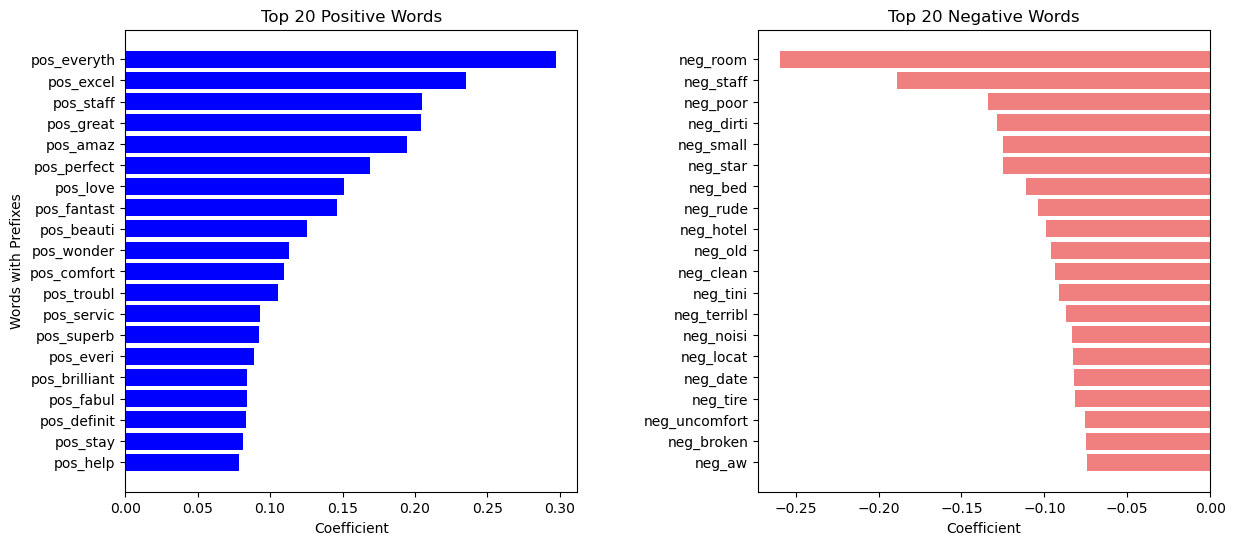

In [70]:
# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Plot top positive words
axs[0].barh(top_positive_words['Feature'], top_positive_words['Coefficient'], color='blue')
axs[0].set_xlabel("Coefficient")
axs[0].set_ylabel("Words with Prefixes")
axs[0].set_title("Top 20 Positive Words")
axs[0].invert_yaxis()

# Plot top negative words
axs[1].barh(top_negative_words['Feature'], top_negative_words['Coefficient'], color='lightcoral')
axs[1].set_xlabel("Coefficient")
axs[1].set_title("Top 20 Negative Words")
axs[1].invert_yaxis()

plt.subplots_adjust(wspace=0.4) 
plt.show()

**Methodology**

We are following the same steps as explained earlier (getting the top word from pre-scaled data).

<br>

**Findings**

- **Highly Impactful Positive Words:** The top positive sentiment words have coefficients as high as **0.297**, indicating their substantial positive influence on sentiment scores.

- **Room Quality's Crucial Role:** In contrast, the word **"room"** is a dominant negative driver, with a coefficient as low as **-0.260**, underlining the pivotal role of room quality in shaping negative sentiment.

- **Strong Influence of Staff:** Both in positive and negative sentiment, the term **"staff"** plays a significant role, reflecting the significance of the hotel staff's performance in influencing guest reviews.

- **Divergence in Magnitude:** The coefficients of positive words are generally smaller in magnitude than those of negative words. The most positive words have coefficients around **0.297**, while the most negative word has a coefficient of **-0.260**, emphasizing the power of negative experiences in shaping reviews.

- **Variability in Negative Words:** Negative words encompass various aspects, from room quality to staff behavior, cleanliness, and noise, highlighting the diversity of negative experiences that can lead to lower sentiment scores.

---

## Decision Tree model on unscaled data. <a class="anchor" id="decision"></a>

In [71]:
# Instantiate the model
DT_model_before_scaling = DecisionTreeClassifier()

# Fit the model
DT_model_before_scaling.fit(X_train_combined, y_train)

# Print out the Train and Test score
print(f'The train accuracy is {DT_model_before_scaling.score(X_train_combined, y_train)}')
print(f'The test accuracy is {DT_model_before_scaling.score(X_test_combined, y_test)}')

The train accuracy is 1.0
The test accuracy is 0.702639751552795


**Methodology**

**1. Model Training:** The Decision Tree model was instantiated using **DecisionTreeClassifier()**.

**2. Model Fitting:** Then it was trained using the training data **(X_train_combined and y_train)**.

**3. Evaluation:** Model **accuracy** was assessed using both the training and test datasets, providing insights into the model's performance.

<br>

**Finding and Analysis**

- **Train Accuracy (1.0):** The Decision Tree model achieved a perfect accuracy of 1.0 on the training dataset, implying that it perfectly fit the training data. However, this high accuracy raises concerns about potential overfitting, where the model may have learned the training data's noise or specific patterns, making it less likely to generalize well to unseen data.

- **Test Accuracy (0.703):** On the test dataset, the model's accuracy dropped to approximately 0.703. While this is still a relatively decent accuracy score, it suggests that the model's performance on unseen data is not as strong as on the training data. The drop in accuracy from the training set to the test set indicates overfitting concerns.

<br>

**Interpretation**

The Decision Tree model demonstrated a stark contrast in performance between the training and test datasets. While achieving a perfect score on the training data may seem promising, it raises concerns about the model's ability to generalize to new, unseen data. The drop in accuracy on the test dataset suggests that the model may be overfitting, capturing noise or idiosyncrasies in the training data rather than learning meaningful patterns.

To address this issue, further steps can be taken to enhance the model's generalization capability, such as hyperparameter tuning and feature scaling. Evaluating the model's performance with scaled data and applying regularization techniques may help mitigate overfitting and improve its predictive power on unseen data.

## Using a pipeline, combine PCA with a decision tree classifier on Scaled Data <a class="anchor" id="pca"></a>

0.7224534161490683
0.7361490683229813
0.7472049689440994
0.7540372670807454
0.753082298136646
0.7507065217391304
0.7408928571428571
0.7290605590062111
0.7159860248447205
0.7089285714285715
0.6989518633540373
0.6940916149068322
0.6910636645962733
0.6867857142857143


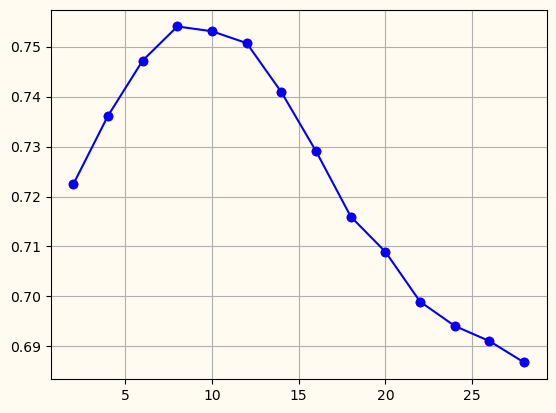

In [117]:
# Initialize an empty list to store accuracy scores
accsco = []

# Loop through a range of maximum depths for Decision Tree
for k in range(2,30,2):
    
    # Create an estimator pipeline with PCA dimensionality reduction and Decision Tree classifier
    estimator = [('PCA',PCA(n_components=20)), ('DT', DecisionTreeClassifier(max_depth = k))]
   
    # Instantiate the model
    pipe = Pipeline(estimator)
    
    # Fit the model on training data
    pipe.fit(X_train_transformed,y_train)
    
    # Get the score on the test data
    sco = pipe.score(X_test_transformed,y_test)
    
    # Append to the empty list
    accsco.append(sco)
    
    # Print out the scores
    print(sco)
    
# Plot the graph
plt.figure(facecolor='#FFFBF0')
ax = plt.axes()
ax.set_facecolor("#FFFBF0")
plt.plot(range(2,30,2),accsco, linestyle='-', marker='o', color='b', label='Trend Line')
plt.scatter(range(2,30,2),accsco, color='r', label='Counts')
plt.grid()
plt.show()

**Interpretation**

**1. Effect of PCA Components:** The pipeline starts by applying PCA to reduce the dimensionality of the feature space to 20 components (n_components). PCA is commonly used for dimensionality reduction, and in this case, it's a preprocessing step to transform the data into a lower-dimensional representation while retaining the most important information.

**2. Decision Tree Classifier:** Following PCA, a Decision Tree classifier is used for classification. The depth of the Decision Tree is an important hyperparameter that can influence the model's complexity and performance.

**3. Accuracy Scores:** The code computes and records the accuracy score for each combination of PCA components and Decision Tree depth. The accuracy score represents how well the model is able to correctly classify data points in the test set.

**4. Accuracy vs. PCA Components:** The accuracy scores are then plotted against the number of PCA components and the varying maximum depth of the Decision Tree. The plot shows how changes in these parameters impact the model's performance.

**5. Finding the Optimal Configuration:** The plot allows for the identification of the configuration that yields the highest accuracy on the test data. This configuration will cbe considered as the most suitable for the given dataset and problem.

**Findings**

The Maximum Optimal Depth should be 10. 

---

#### PCA + Decision Tree Classifier

In [74]:
# Import the mkdtemp function from the tempfile module for creating a temporary cache directory.
from tempfile import mkdtemp

 # Create a temporary cache directory and store its path in the 'cachedir' variable.
cachedir = mkdtemp()

# Define a list of estimators to be used in the pipeline.
estimators = [('pca', PCA(n_components=20)),       # Add Principal Component Analysis (PCA) with 20 components as the first estimator.
              ('DT', DecisionTreeClassifier())]    # Add a Decision Tree Classifier as the second estimator.

# Create a pipeline with the specified estimators and use the 'cachedir' as memory for optimization.
pipe = Pipeline(estimators, memory=cachedir)

In [75]:
# Define a grid with parameters (max_depth, min_samples_leaf, min_samples_split)
param_grid = {
        'DT__max_depth' : [5,10,20], 
        'DT__min_samples_leaf' : [5, 10],
        'DT__min_samples_split' : [0.01, 0.1]
}

# Create a grid search object using the defined pipeline and parameter grid.
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the grid search to the training data.
grid_search.fit(X_train_transformed, y_train)

# Print the best cross-validated score found during the grid search.
print(grid_search.best_score_)

# Print the best combination of hyperparameters that resulted in the best score.
print(grid_search.best_params_)

0.7519248178610282
{'DT__max_depth': 10, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 0.01}


In [76]:
# Print the best estimator (pipeline) found during the grid search, which includes the best combination of hyperparameters.
print(grid_search.best_estimator_)

Pipeline(memory='C:\\Users\\kkaka\\AppData\\Local\\Temp\\tmpxtfbpz4r',
         steps=[('pca', PCA(n_components=20)),
                ('DT',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=0.01))])


**Analysis and Findings**

In the above code, a **grid search** is performed to **optimize the hyperparameters** for a machine learning pipeline that includes **Principal Component Analysis (PCA)** and a **Decision Tree classifier (DT)**. The grid search is conducted using **cross-validation with a 5-fold split**. Here are the findings:

- **Best Cross-Validated Score:** The best cross-validated score obtained during the grid search is approximately **0.752**. This score represents the model's performance when evaluated on different subsets of the training data.

- **Optimal Hyperparameters:** The combination of hyperparameters that resulted in the best cross-validated score is as follows:
> - **Max Depth of Decision Tree (DT__max_depth): 10**
> - **Minimum Samples per Leaf (DT__min_samples_leaf): 5**
> - **Minimum Samples to Split a Node (DT__min_samples_split): 0.01**

These findings suggest that the model performs best with a Decision Tree of moderate depth (max_depth = **10**) and relatively strict criteria for splitting nodes (min_samples_split = **0.01**) and minimum samples per leaf (min_samples_leaf = **5**). These hyperparameters were identified through cross-validation as the most suitable configuration for the given dataset.

The optimized model with these hyperparameters is expected to have improved generalization performance when making predictions on new, unseen data.

#### Changing the Parameters

In [77]:
# Create aanother temporary cache directory and store its path in the 'cachedir1' variable.
cachedir1 = mkdtemp()

# Define a list of estimators to be used in the pipeline.
estimators1 = [('pca', PCA(n_components=20)),
              ('DT', DecisionTreeClassifier())]

# Create a pipeline called 'pipe1' with the specified estimators (estimators1) and use the 'cachedir1' as memory for optimization.
pipe1 = Pipeline(estimators1, memory=cachedir1)

In [79]:
# Define a grid with optimized parameters (max_depth, min_samples_leaf, min_samples_split)
param_grid1 = {
        'DT__max_depth' : [5,10], 
        'DT__min_samples_leaf' : [2,4,6],
        'DT__min_samples_split' : [2,4]
}

# Create a grid search object using the defined pipeline and parameter grid
grid_search1 = GridSearchCV(pipe1, param_grid1, cv=5)

# Fit the grid search to the training data.
grid_search1.fit(X_train_transformed, y_train)

# Print the best cross-validated score
print(grid_search1.best_score_)

# Print the best combination of hyperparameters 
print(grid_search1.best_parabms_)

0.7532084710967817
{'DT__max_depth': 10, 'DT__min_samples_leaf': 6, 'DT__min_samples_split': 2}


**Finding**

In this code, a **new grid search** is performed using a different set of hyperparameter values for the **Decision Tree classifier** within the **PCA-Decision Tree pipeline**. The results are compared with the previous grid search. 

Here are the interpretations:
- **Best Cross-Validated Score (New)**: The best cross-validated score obtained in the new grid search is approximately **0.753**. This score represents the model's performance when evaluated on different subsets of the training data.

- **Optimal Hyperparameters (New):** The combination of hyperparameters that resulted in the best cross-validated score for this new grid search is as follows:
> - Max Depth of Decision Tree (DT__max_depth): **10**
> - Minimum Samples per Leaf (DT__min_samples_leaf): **6**
> - Minimum Samples to Split a Node (DT__min_samples_split): **2**

---

**Comparison between Decision Tree - Pre-scaled and Post-scaled (with PCA)**

Now, let's compare these findings with the previous grid search:

**1. Best Cross-Validated Score (Previous):** The previous grid search resulted in a best score of approximately **0.752**.

**2. Optimal Hyperparameters (Previous):** The previous grid search identified hyperparameters with a max depth of **10**, minimum samples per leaf of **5**, and minimum samples to split a node of **0.01**.


**Comparing the two grid searches, the new set of hyperparameters has led to a slightly higher cross-validated score, indicating improved model performance. Specifically, the new hyperparameters include a higher minimum samples per leaf (6), which suggests a preference for larger leaf nodes. Additionally, the minimum samples to split a node is also higher (2), indicating a preference for fewer splits. These adjustments in hyperparameters have resulted in a better-performing model compared to the previous configuration.**

---

## Which is the Best Performance model? <a class="anchor" id="bestModel"></a>
#### 1. Logistic regression 
#### 2. Decision Tree 
#### 3. PCA with Decision Tree classifier


The best-performing model among the three options is the **Decision Tree model with PCA preprocessing**.

**1. Logistic Regression before Scaling:**
- Training Score: 0.7251
- Test Score: 0.7274
- Interpretation: This model yields decent accuracy, but it doesn't excel in capturing complex relationships within the data. The scores are close, indicating some potential overfitting.


**2. Decision Tree before Scaling:**
- Training Score: 1.0
- Test Score: 0.7026
- Interpretation: While this model achieves perfect accuracy on the training data, it performs poorly on the test data, a clear sign of overfitting. It fails to generalize well.


**3. Decision Tree with PCA:**
- Cross-Validated Score: 0.753
- Best Parameters: {'DT__max_depth': 10, 'DT__min_samples_leaf': 6, 'DT__min_samples_split': 2}
- Interpretation: This model, enhanced by Principal Component Analysis (PCA) and hyperparameter tuning, strikes an excellent balance between predictive power and generalization. The cross-validated score suggests its superior performance in classifying the data, providing the best trade-off between bias and variance.


**In summary, the Decision Tree model with PCA preprocessing is the top choice. It combines feature reduction with an optimized Decision Tree classifier, resulting in the highest cross-validated score and balanced predictive performance, making it the most reliable model for this classification task.**

---

## For our best performing model (Decision Tree with PCA), we will conduct a more in-depth evaluation by analyzing the confusion matrix. <a class="anchor" id="confusion"></a>

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels of the testing data using the optimized Decision Tree with PCA model
y_pred = grid_search1.best_estimator_.predict(X_test_transformed)

# Confusion matrix for the optimized Decision Tree with PCA model
cf_matrix = confusion_matrix(y_test, y_pred)

# Label rows and columns
cf_df = pd.DataFrame(cf_matrix, 
                     columns=['Predicted 0', 'Predicted 1'], 
                     index=['Actual 0', 'Actual 1']
)

# Display the confusion matrix
display(cf_df)

,Predicted 0,Predicted 1
Actual 0,36927,18169
Actual 1,13658,60046


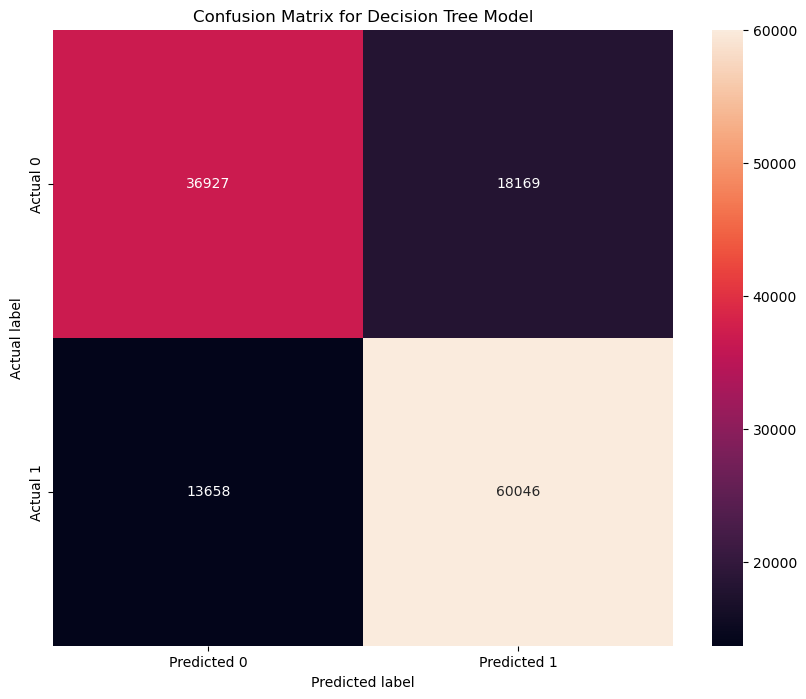

In [113]:
# plotting the confusion matrix for the optimized Decision Tree model
plt.figure(figsize=(10, 8))
sns.heatmap(cf_df, annot=True, fmt='g')
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# TEST
print("TEST SET")
print(classification_report(y_test, y_pred))

TEST SET
              precision    recall  f1-score   support

           0       0.73      0.67      0.70     55096
           1       0.77      0.81      0.79     73704

    accuracy                           0.75    128800
   macro avg       0.75      0.74      0.74    128800
weighted avg       0.75      0.75      0.75    128800



#### Findings

From the confusion matrix and classification report, we can draw the following findings for the Decision Tree model with PCA preprocessing:

**Confusion Matrix:**
- True Positives (Actual 1, Predicted 1): 60,046
- True Negatives (Actual 0, Predicted 0): 36,927
- False Positives (Actual 0, Predicted 1): 18,169
- False Negatives (Actual 1, Predicted 0): 13,658



**Classification Report:**
- Precision for class 0 (negative sentiment) is approximately 0.73, indicating that among the predicted negative cases, about 73% are correct.
- Precision for class 1 (positive sentiment) is approximately 0.77, suggesting that among the predicted positive cases, about 77% are correct.
- Recall for class 0 (negative sentiment) is approximately 0.67, signifying that the model correctly identifies 67% of the actual negative cases.
- Recall for class 1 (positive sentiment) is around 0.81, indicating that the model correctly identifies 81% of the actual positive cases.
- The F1-score, which balances precision and recall, is approximately 0.70 for class 0 and 0.79 for class 1.




**Overall Analysis:**

- The model's accuracy on the test set is 0.75, indicating that it correctly predicts 75% of the cases.
- The model performs better in predicting positive sentiment (class 1) compared to negative sentiment (class 0), as reflected by higher precision and recall values for class 1.
- The F1-score for class 1 is notably higher, suggesting that the model is better at correctly identifying positive sentiment.
- However, there is room for improvement, especially in predicting negative sentiment (class 0), as indicated by the lower F1-score for class 0.

---

## Conclusion <a class="anchor" id="conclusion"></a>

Based on our findings, the **Decision Tree combined with PCA preprocessing** should be our prefereed model of choice. This combination of feature reduction and an optimized Decision Tree classifier yields the highest cross-validated score. It provides a well-balanced and reliable model for the classification task at hand.

In **conclusion**, this project demonstrated the potential of machine learning for Sentiment Analysis on Hotel Reviews. Although our models could be further improved and tuned, they provide valuable insights into the sentiment behind hotel reviews and the key words associated with good and bad reviews. Future work should focus on testing more features.

---